<a href="https://colab.research.google.com/github/RamadhikaS/CapstoneUASBengkod/blob/main/Copy_of_BengkodUAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Nama : Ramadhika Surya Purmiadanu
#NIM    : A11.2022.14116

In [2]:
# Import library dasar yang dibutuhkan untuk analisis data dan visualisasi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pengaturan agar plot Seaborn tampil lebih menarik
sns.set_theme(style="whitegrid")

print("Library telah berhasil diimport.")

Library telah berhasil diimport.


In [3]:
# Menghubungkan Google Colab dengan Google Drive untuk mengakses dataset
from google.colab import drive
drive.mount('/content/drive')

# Mendefinisikan path file dan memuat dataset ke dalam DataFrame pandas
file_path = "/content/drive/MyDrive/ObesityDataSet.csv"
df = pd.read_csv(file_path)

print("Dataset berhasil dimuat.")

Mounted at /content/drive
Dataset berhasil dimuat.


In [4]:
# Menampilkan 5 baris pertama dari dataset untuk mendapatkan gambaran awal
print("Lima baris pertama dari dataset:")
df.head()

Lima baris pertama dari dataset:


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
# Menampilkan informasi ringkas tentang DataFrame, termasuk tipe data per kolom dan jumlah nilai non-null.
print("Informasi Umum Dataset:")
df.info()

Informasi Umum Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                     

In [6]:
# Mengidentifikasi kolom-kolom yang seharusnya numerik berdasarkan deskripsi dataset
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Mengubah tipe data kolom-kolom tersebut menjadi numerik.
# 'errors='coerce'' akan mengubah nilai yang tidak bisa dikonversi menjadi NaN (Not a Number)
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Memeriksa kembali tipe data setelah konversi
print("Tipe data setelah konversi:")
df.info()

Tipe data setelah konversi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2089 non-null   float64
 1   Gender                          2102 non-null   object 
 2   Height                          2089 non-null   float64
 3   Weight                          2092 non-null   float64
 4   CALC                            2106 non-null   object 
 5   FAVC                            2100 non-null   object 
 6   FCVC                            2093 non-null   float64
 7   NCP                             2089 non-null   float64
 8   SCC                             2101 non-null   object 
 9   SMOKE                           2106 non-null   object 
 10  CH2O                            2096 non-null   float64
 11  family_history_with_overweight  2098 non-null   object 
 12  FAF   

In [7]:
# Menampilkan statistik deskriptif (mean, std, min, max, dll.) untuk kolom numerik.
print("Statistik Deskriptif untuk Kolom Numerik:")
df.describe()

Statistik Deskriptif untuk Kolom Numerik:


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2089.000000,2089.000000,2092.000000,2093.000000,2089.000000,2096.000000,2092.000000,2096.000000
mean,24.717928,1.706623,88.608184,2.443519,2.729418,2.030560,1.073435,0.680138
std,8.391323,0.117700,36.154617,0.642754,0.981124,0.737945,1.149364,0.717160
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.955257,1.630000,66.000000,2.000000,2.675411,1.569911,0.129009,0.000000
50%,22.814657,1.701284,83.000000,2.397284,3.000000,2.000000,1.000000,0.625360
75%,26.000000,1.770000,108.055736,3.000000,3.000000,2.482454,1.683612,1.000000
max,106.441252,2.853986,441.131078,8.706795,12.299828,9.233294,12.270275,7.669504


In [8]:
# Mengidentifikasi kolom kategorikal (tipe 'object')
categorical_cols = df.select_dtypes(include=['object']).columns

# Menampilkan nilai-nilai unik dari setiap kolom kategorikal untuk menemukan anomali
print("Nilai Unik pada Kolom Kategorikal:")
for col in categorical_cols:
    print(f"- {col}: {df[col].unique()}")

Nilai Unik pada Kolom Kategorikal:
- Gender: ['Female' 'Male' '?' nan]
- CALC: ['no' 'Sometimes' 'Frequently' '?' 'Always' nan]
- FAVC: ['no' 'yes' '?' nan]
- SCC: ['no' 'yes' nan '?']
- SMOKE: ['no' 'yes' '?' nan]
- family_history_with_overweight: ['yes' 'no' nan '?']
- CAEC: ['Sometimes' 'Frequently' 'Always' 'no' nan '?']
- MTRANS: ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike' '?' nan]
- NObeyesdad: ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


In [9]:
# Mengganti semua kemunculan '?' dengan nilai NaN (Not a Number) dari NumPy
# Ini adalah langkah standarisasi agar semua data yang hilang seragam.
df.replace("?", np.nan, inplace=True)

print("Nilai '?' telah berhasil diganti dengan NaN.")

Nilai '?' telah berhasil diganti dengan NaN.


In [10]:
# Menghitung jumlah total nilai NaN (missing values) di setiap kolom
missing_values = df.isnull().sum()

# Menampilkan hanya kolom yang memiliki missing values
print("Jumlah Missing Values per Kolom:")
print(missing_values[missing_values > 0].sort_values(ascending=False))

Jumlah Missing Values per Kolom:
family_history_with_overweight    23
Age                               22
Height                            22
Gender                            22
NCP                               22
FAVC                              22
CALC                              20
Weight                            19
FAF                               19
FCVC                              18
CAEC                              18
SCC                               18
TUE                               15
CH2O                              15
SMOKE                             13
MTRANS                            12
dtype: int64


In [11]:
# Menghitung dan menampilkan jumlah baris data yang duplikat
duplicate_rows = df.duplicated().sum()
print(f"Jumlah baris data yang duplikat: {duplicate_rows}")

Jumlah baris data yang duplikat: 18


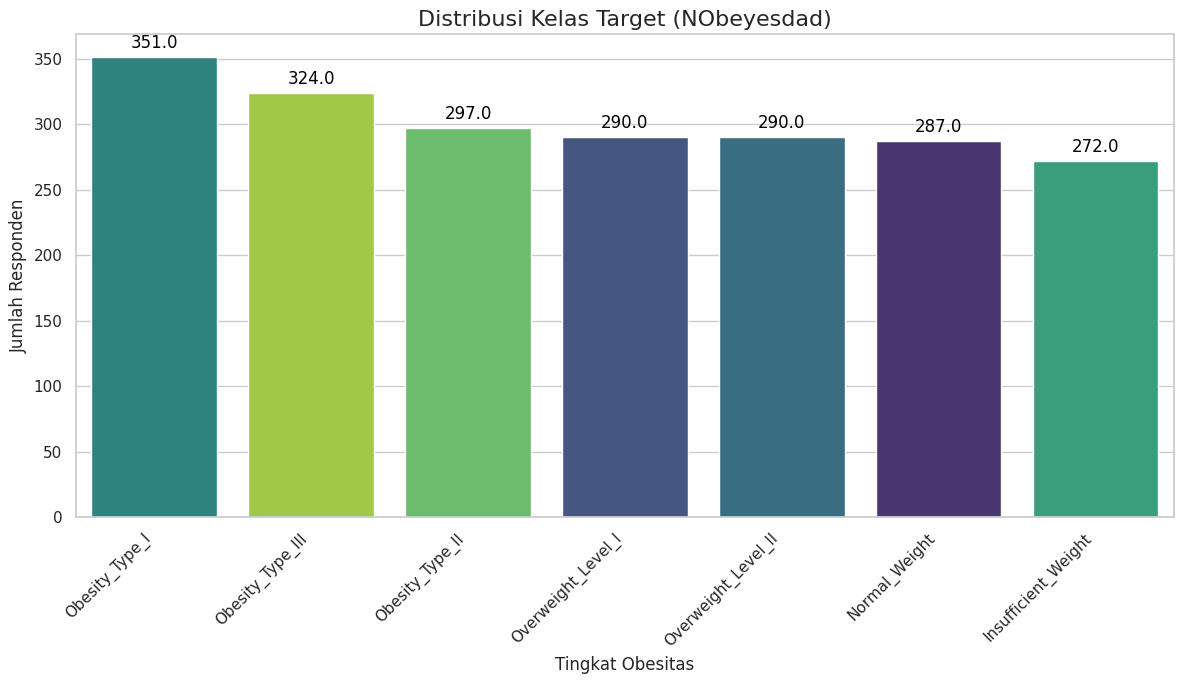

In [12]:
# (Ganti Cell 11 Anda dengan ini)

# Memeriksa distribusi dari variabel target 'NObeyesdad'
plt.figure(figsize=(12, 7))

# Mengurutkan bar berdasarkan jumlahnya untuk tampilan yang lebih rapi
order_list = df['NObeyesdad'].value_counts().index

# Membuat plot dengan sintaks yang diperbarui untuk menghindari warning
# Kita menetapkan x dan hue ke kolom yang sama, lalu menyembunyikan legenda.
ax = sns.countplot(data=df, x='NObeyesdad', hue='NObeyesdad', order=order_list, palette='viridis', legend=False)

# Menambahkan label jumlah di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.title('Distribusi Kelas Target (NObeyesdad)', fontsize=16)
plt.xlabel('Tingkat Obesitas', fontsize=12)
plt.ylabel('Jumlah Responden', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

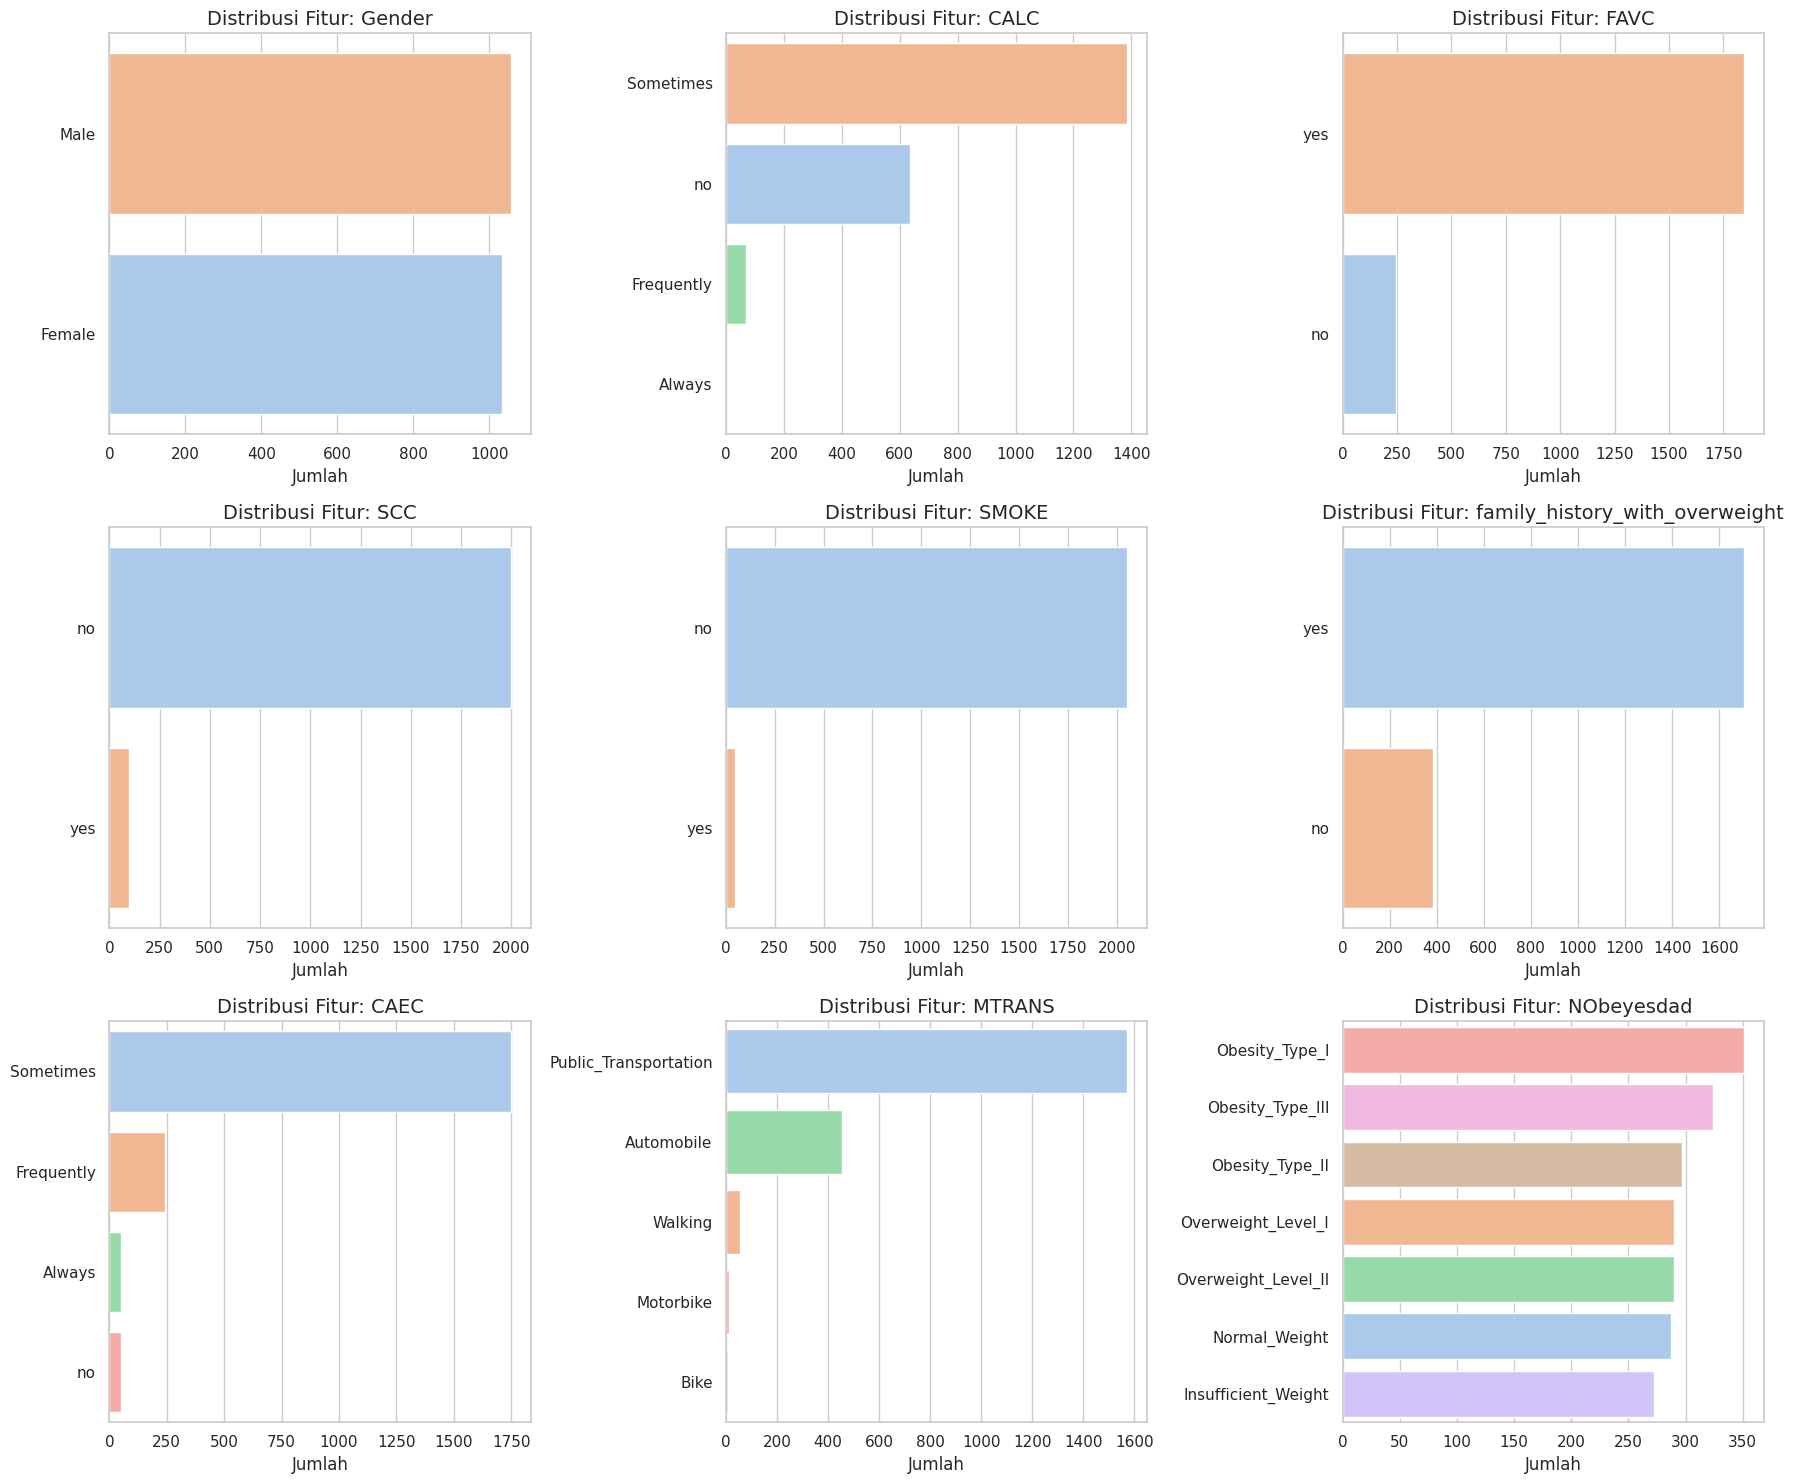

In [13]:
# (Ganti Cell 12 Anda dengan ini)

# Mengambil daftar kolom kategorikal (yang bukan target)
# Kita pastikan kolom target 'NObeyesdad' tidak ikut divisualisasikan di sini
categorical_features = df.select_dtypes(include=['object']).columns

# Membuat subplot untuk setiap fitur kategorikal
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))
axes = axes.flatten() # Meratakan array axes agar mudah di-loop

# Loop untuk membuat countplot untuk setiap fitur
for i, col in enumerate(categorical_features):
    # Mengurutkan bar berdasarkan jumlah untuk tampilan yang lebih rapi
    order = df[col].value_counts().index

    # Sintaks yang diperbarui: y=col, hue=col, legend=False
    sns.countplot(data=df, y=col, ax=axes[i], order=order, palette='pastel', hue=col, legend=False)

    axes[i].set_title(f'Distribusi Fitur: {col}', fontsize=14)
    axes[i].set_xlabel('Jumlah')
    axes[i].set_ylabel('')

# Menghapus plot yang tidak terpakai jika jumlah fitur ganjil
if len(categorical_features) < len(axes):
    for j in range(len(categorical_features), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

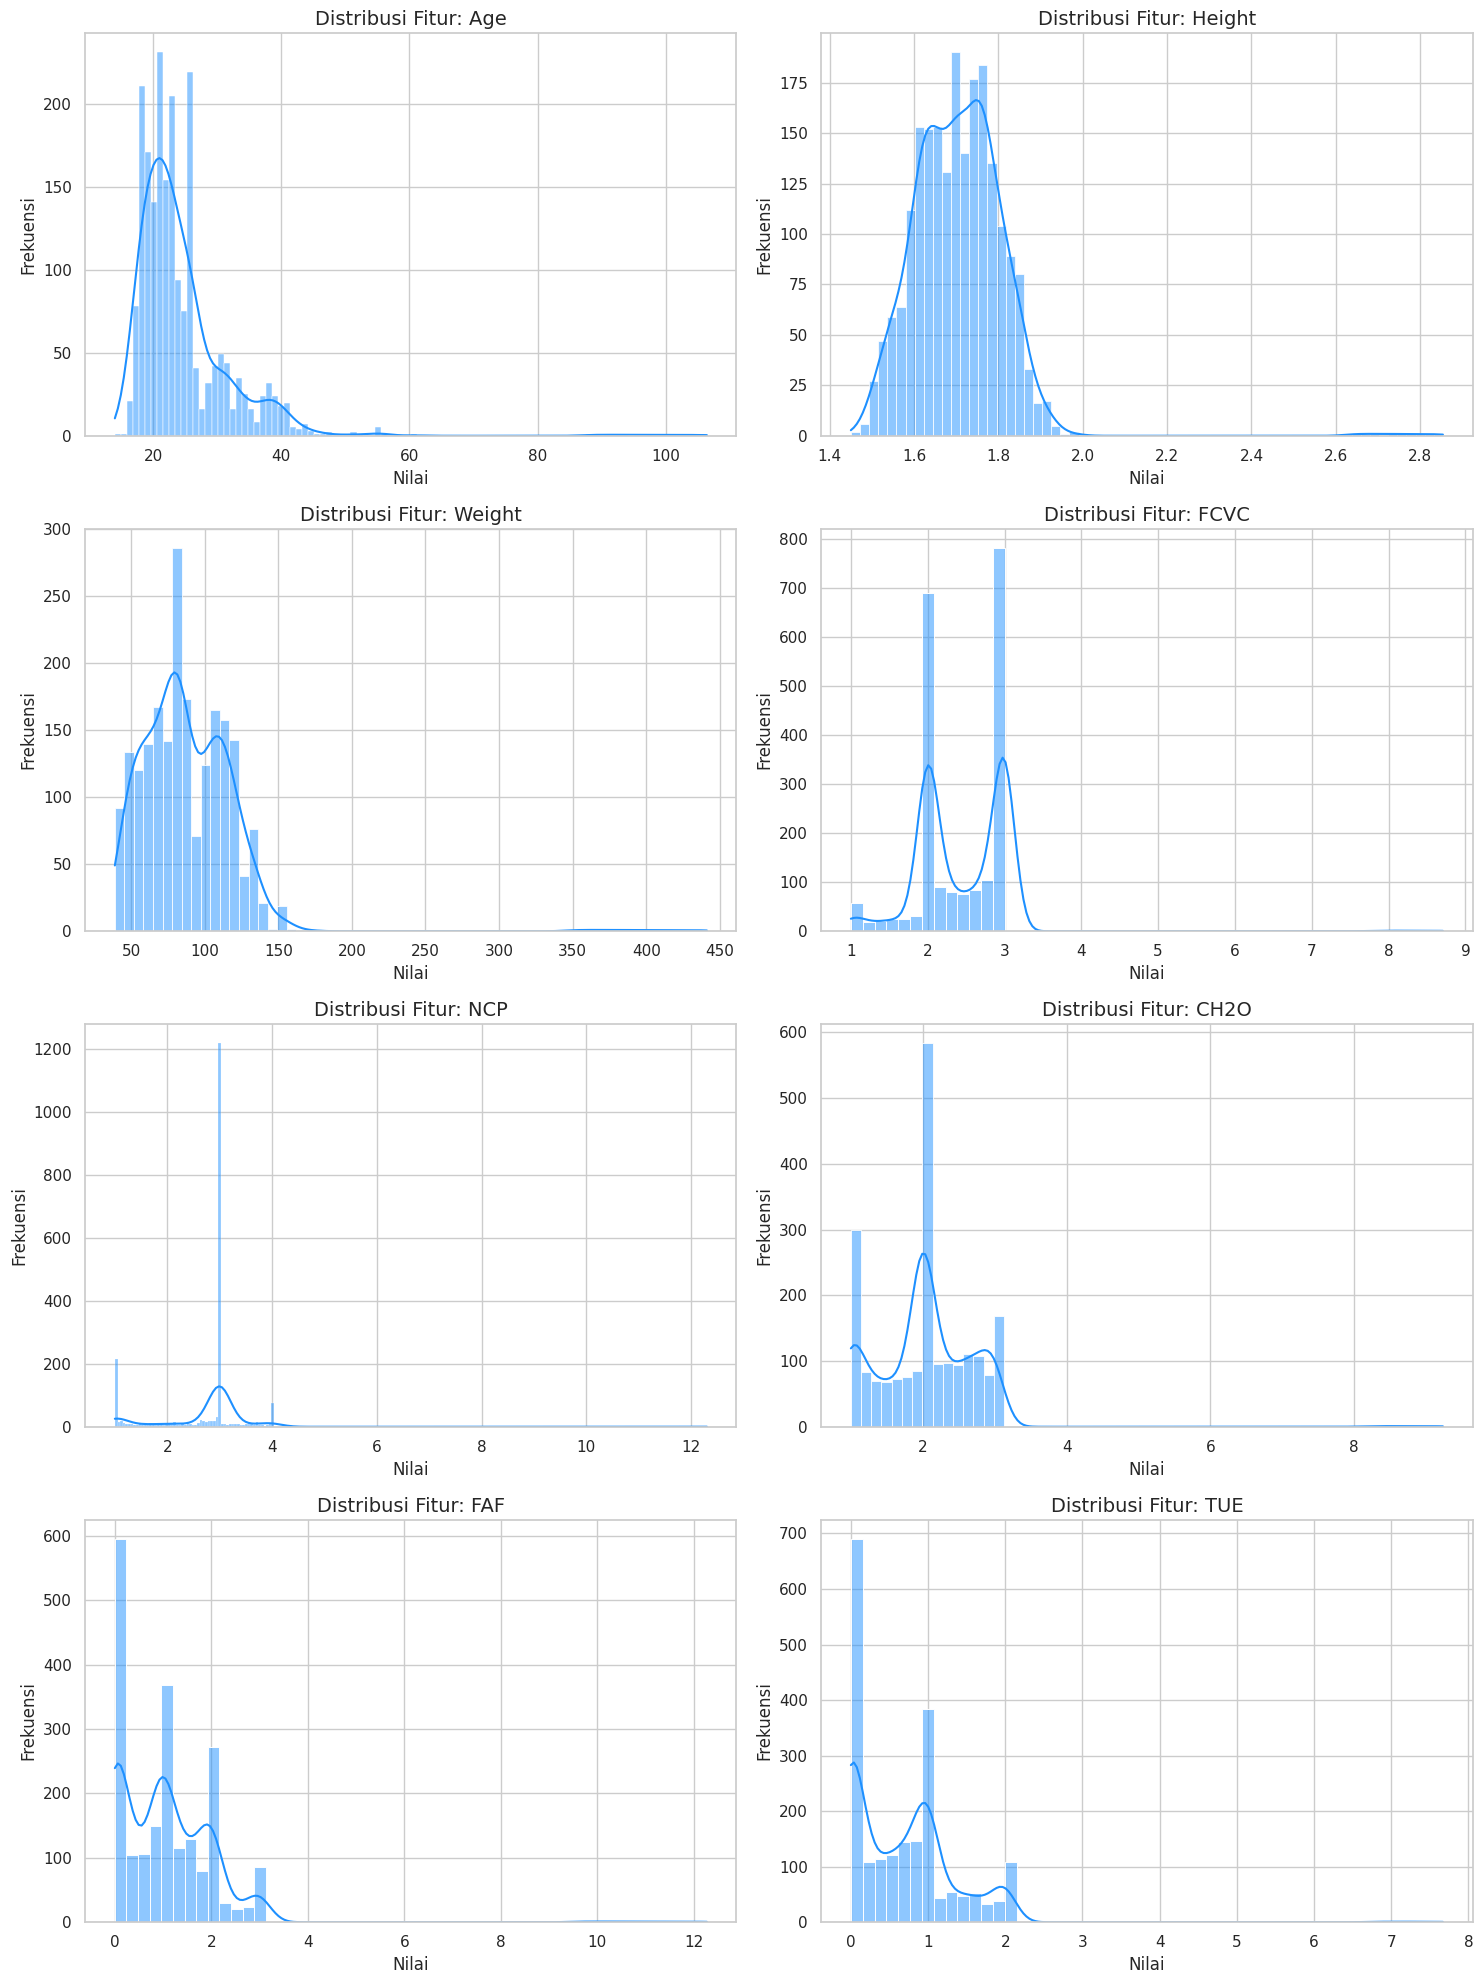

In [14]:
# Mengambil daftar kolom numerik
numeric_features = df.select_dtypes(include=np.number).columns

# Membuat subplot untuk setiap fitur numerik
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.flatten()

# Loop untuk membuat histogram dan KDE plot untuk setiap fitur
for i, col in enumerate(numeric_features):
    sns.histplot(df[col], kde=True, ax=axes[i], color='dodgerblue')
    axes[i].set_title(f'Distribusi Fitur: {col}', fontsize=14)
    axes[i].set_xlabel('Nilai')
    axes[i].set_ylabel('Frekuensi')

plt.tight_layout()
plt.show()

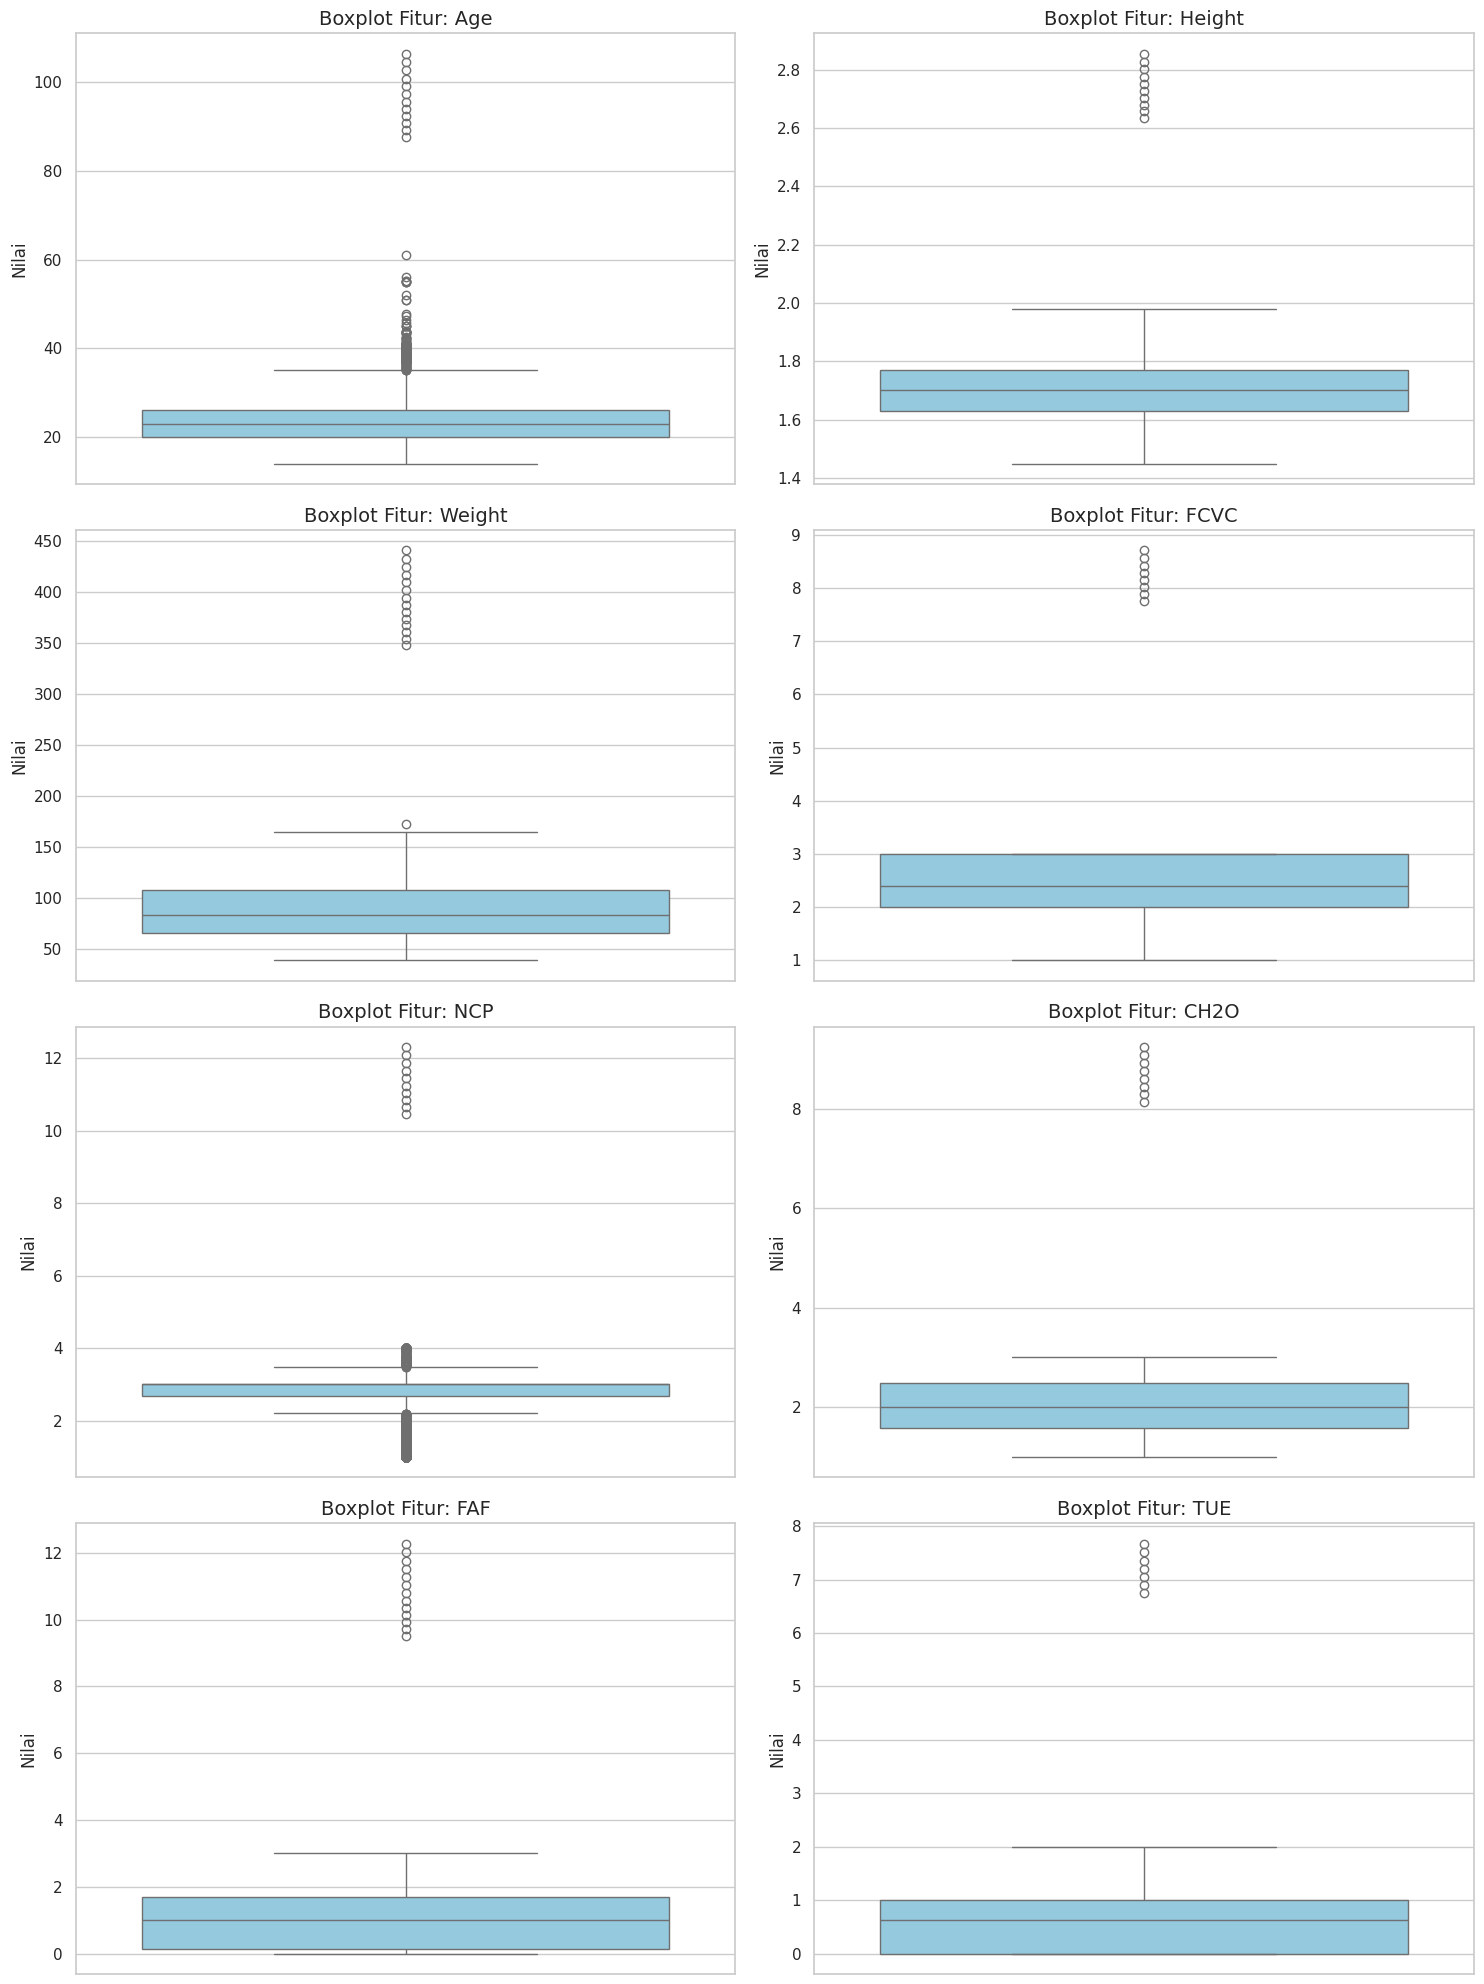

In [15]:
# Membuat subplot untuk boxplot setiap fitur numerik
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.flatten()

# Loop untuk membuat boxplot untuk setiap fitur
for i, col in enumerate(numeric_features):
    sns.boxplot(y=df[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Boxplot Fitur: {col}', fontsize=14)
    axes[i].set_ylabel('Nilai')

plt.tight_layout()
plt.show()

Berdasarkan analisis eksplorasi data yang telah dilakukan, berikut adalah beberapa kesimpulan utama:

1.  **Kualitas Data**:
    *   Dataset memiliki **missing values** yang perlu ditangani. Ini berasal dari data kosong, kesalahan konversi tipe data, dan nilai `'?'` yang telah distandarisasi menjadi NaN.
    *   Terdapat **18 baris data duplikat** yang harus dihapus pada tahap preprocessing.
    *   Beberapa kolom numerik seperti `Weight`, `Age`, dan `NCP` memiliki **outlier** yang signifikan dan perlu penanganan khusus.

2.  **Karakteristik Data**:
    *   **Tipe Data**: Beberapa kolom numerik awalnya terbaca sebagai `object` dan telah berhasil dikonversi. Terdapat campuran fitur numerik dan kategorikal yang memerlukan encoding.
    *   **Distribusi Fitur**: Banyak fitur numerik memiliki distribusi yang miring (*skewed*), yang mengindikasikan perlunya normalisasi atau standarisasi.
    *   **Variabel Target**: Variabel target `NObeyesdad` memiliki **7 kelas yang relatif seimbang**. Ini adalah kondisi yang baik dan kemungkinan besar tidak memerlukan teknik penyeimbangan kelas seperti SMOTE.

3.  **Langkah Selanjutnya (Arah untuk Preprocessing)**:
    *   Menangani *missing values* (misalnya dengan imputasi atau penghapusan).
    *   Menghapus data duplikat.
    *   Menangani *outlier*.
    *   Melakukan *encoding* pada fitur kategorikal.
    *   Melakukan penskalaan (normalisasi/standarisasi) pada fitur numerik.

In [16]:
# Membuat salinan dari DataFrame asli untuk preprocessing
# Ini adalah praktik yang baik agar tidak mengubah data asli secara permanen
df_processed = df.copy()

print("Salinan DataFrame 'df_processed' telah dibuat.")

Salinan DataFrame 'df_processed' telah dibuat.


In [17]:
# Menampilkan jumlah duplikat sebelum dibersihkan
print(f"Jumlah duplikat sebelum dibersihkan: {df_processed.duplicated().sum()}")

# Menghapus baris yang duplikat
df_processed.drop_duplicates(inplace=True)

# Menampilkan jumlah duplikat setelah dibersihkan
print(f"Jumlah duplikat setelah dibersihkan: {df_processed.duplicated().sum()}")
print(f"Jumlah data setelah menghapus duplikat: {len(df_processed)}")

Jumlah duplikat sebelum dibersihkan: 18
Jumlah duplikat setelah dibersihkan: 0
Jumlah data setelah menghapus duplikat: 2093


In [18]:
# (Ganti Cell 18 Anda dengan ini)

# Cek kembali jumlah missing values sebelum imputasi
print("Jumlah missing values sebelum imputasi:")
print(df_processed.isnull().sum()[df_processed.isnull().sum() > 0])
print("-" * 30)

# Strategi Imputasi:
# - Untuk kolom numerik, kita isi dengan median.
# - Untuk kolom kategorikal, kita isi dengan modus.

# Mengidentifikasi kolom numerik dan kategorikal yang punya missing values
numeric_cols_with_na = df_processed.select_dtypes(include=np.number).columns[df_processed.select_dtypes(include=np.number).isnull().any()]
categorical_cols_with_na = df_processed.select_dtypes(include='object').columns[df_processed.select_dtypes(include='object').isnull().any()]

# Lakukan imputasi dengan metode re-assignment (best practice)
for col in numeric_cols_with_na:
    median_val = df_processed[col].median()
    df_processed[col] = df_processed[col].fillna(median_val)

for col in categorical_cols_with_na:
    mode_val = df_processed[col].mode()[0]
    df_processed[col] = df_processed[col].fillna(mode_val)

# Cek kembali untuk memastikan tidak ada lagi missing values
print("Jumlah missing values setelah imputasi:")
print(f"Total missing values: {df_processed.isnull().sum().sum()}")

Jumlah missing values sebelum imputasi:
Age                               22
Gender                            22
Height                            22
Weight                            19
CALC                              20
FAVC                              22
FCVC                              18
NCP                               22
SCC                               18
SMOKE                             13
CH2O                              15
family_history_with_overweight    23
FAF                               19
TUE                               15
CAEC                              18
MTRANS                            12
dtype: int64
------------------------------
Jumlah missing values setelah imputasi:
Total missing values: 0


Visualisasi Boxplot SEBELUM Penanganan Outlier:


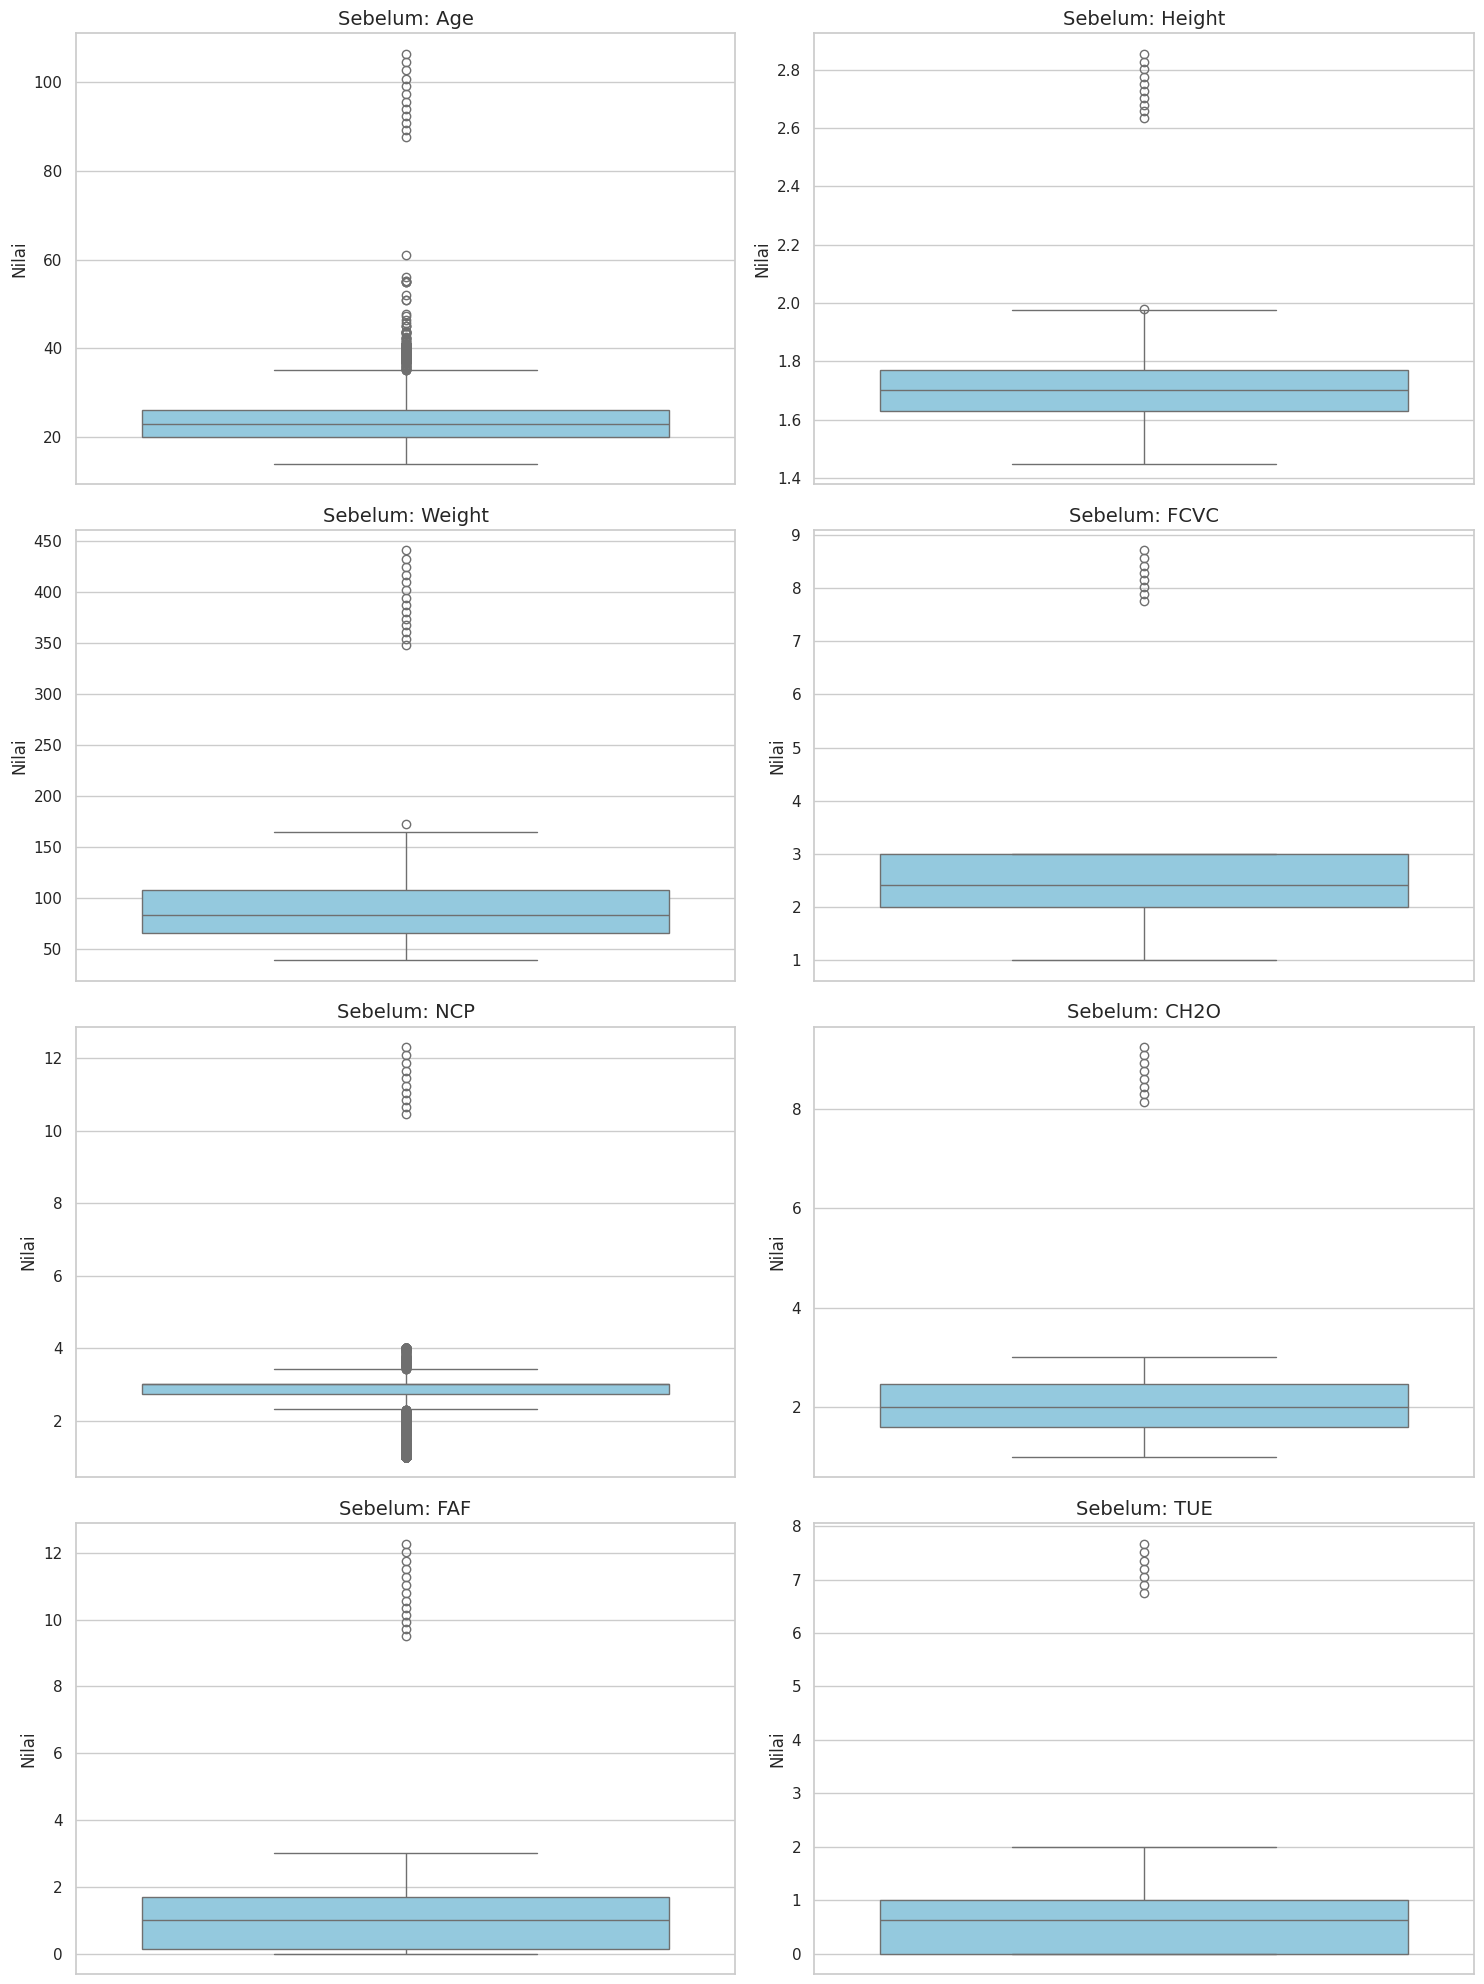


Jumlah outlier sebelum penanganan:
{'Age': 179, 'Height': 11, 'Weight': 15, 'FCVC': 8, 'NCP': 599, 'CH2O': 8, 'FAF': 13, 'TUE': 7}

Proses capping outlier selesai.

Jumlah outlier setelah penanganan (capping):
{'Age': 0, 'Height': 0, 'Weight': 0, 'FCVC': 0, 'NCP': 0, 'CH2O': 0, 'FAF': 0, 'TUE': 0}

Visualisasi Boxplot SETELAH Penanganan Outlier:


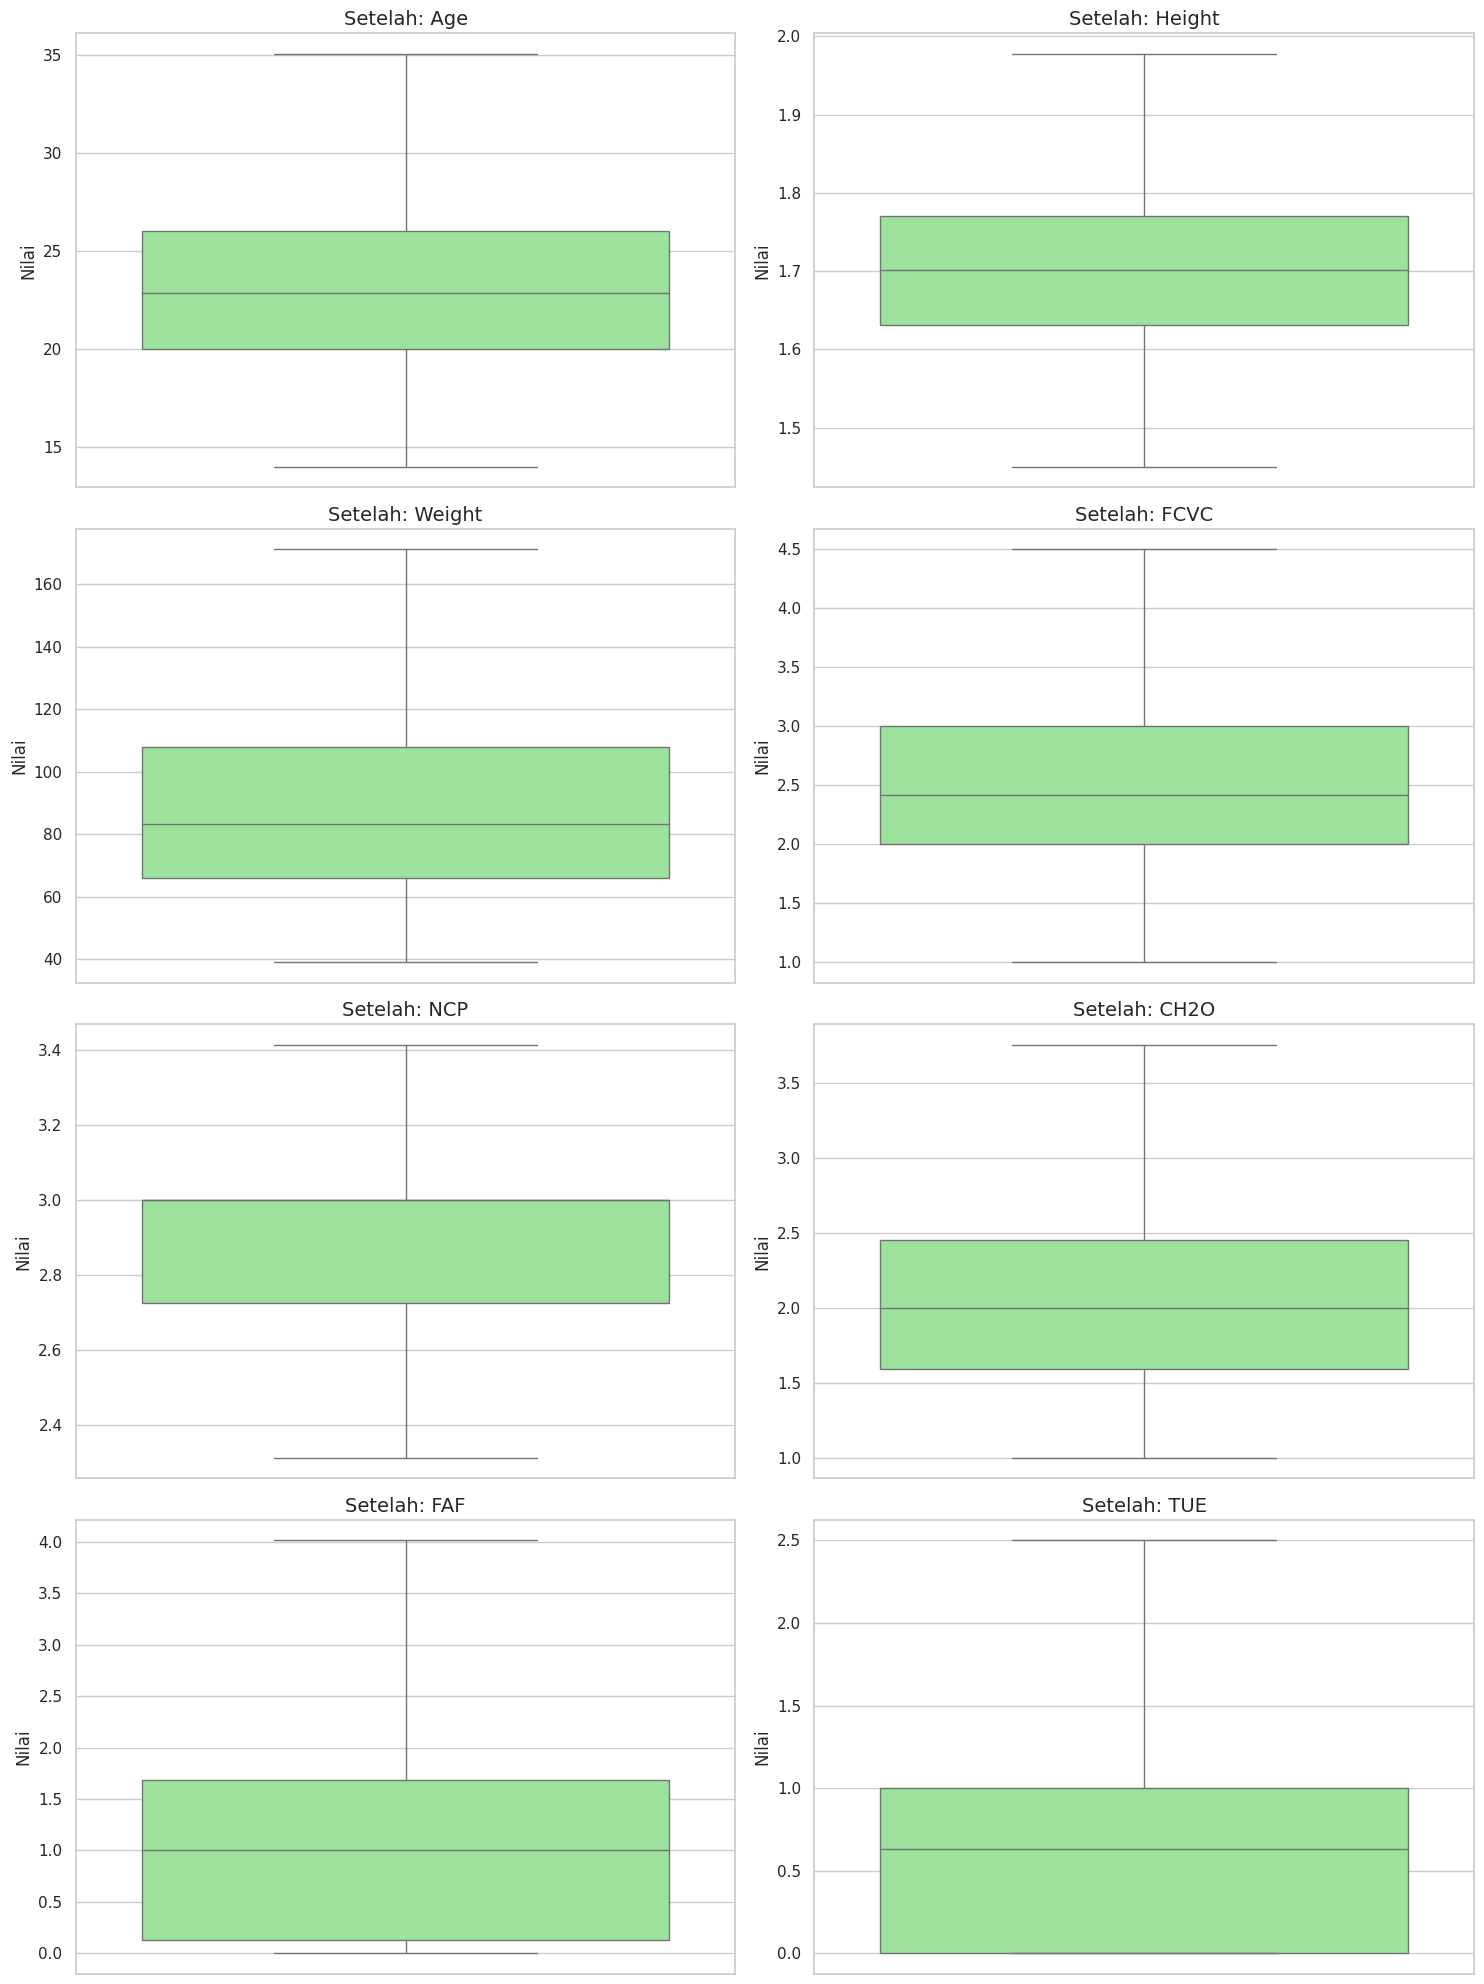

In [19]:
# (Ganti Cell 19 Anda dengan versi yang benar ini)

# --- 0. Mendefinisikan Fungsi Helper ---
# Fungsi ini akan kita gunakan untuk menghitung jumlah outlier berdasarkan metode IQR
def count_outliers(df, columns):
    outlier_counts = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        count = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
        outlier_counts[col] = count
    return outlier_counts

# Mengambil daftar kolom numerik untuk diperiksa outliernya
numeric_features = df_processed.select_dtypes(include=np.number).columns

# --- 1. Visualisasi dan Hitung SEBELUM Penanganan Outlier ---
print("Visualisasi Boxplot SEBELUM Penanganan Outlier:")
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.flatten()
for i, col in enumerate(numeric_features):
    sns.boxplot(y=df_processed[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Sebelum: {col}', fontsize=14)
    axes[i].set_ylabel('Nilai')
plt.tight_layout()
plt.show()

print("\nJumlah outlier sebelum penanganan:")
print(count_outliers(df_processed, numeric_features))

# --- 2. Proses Penanganan Outlier dengan Capping IQR ---
for col in numeric_features:
    Q1 = df_processed[col].quantile(0.25)
    Q3 = df_processed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Ganti nilai di bawah lower_bound dengan lower_bound, dan di atas upper_bound dengan upper_bound
    df_processed[col] = np.where(df_processed[col] < lower_bound, lower_bound, df_processed[col])
    df_processed[col] = np.where(df_processed[col] > upper_bound, upper_bound, df_processed[col])

print("\nProses capping outlier selesai.")

# --- 3. Visualisasi dan Hitung SETELAH Penanganan Outlier ---
print("\nJumlah outlier setelah penanganan (capping):")
print(count_outliers(df_processed, numeric_features))

print("\nVisualisasi Boxplot SETELAH Penanganan Outlier:")
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
axes = axes.flatten()
for i, col in enumerate(numeric_features):
    sns.boxplot(y=df_processed[col], ax=axes[i], color='lightgreen')
    axes[i].set_title(f'Setelah: {col}', fontsize=14)
    axes[i].set_ylabel('Nilai')
plt.tight_layout()
plt.show()

In [20]:
# Mengidentifikasi jenis-jenis kolom kategorikal
# 'NObeyesdad' adalah target, kita akan encode secara terpisah nanti agar lebih terkontrol.
categorical_cols = df_processed.select_dtypes(include=['object']).columns.drop('NObeyesdad')

# Kolom Biner (yes/no, male/female) -> Cocok untuk Label Encoding
binary_cols = ['family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC', 'Gender']

# Kolom Ordinal (ada tingkatan) -> Cocok untuk Label Encoding, tapi perlu mapping manual
# 'CAEC' (konsumsi snack) dan 'CALC' (konsumsi alkohol) bisa dianggap ordinal.
ordinal_cols = ['CAEC', 'CALC']

# Kolom Nominal (tidak ada tingkatan) -> Cocok untuk One-Hot Encoding
nominal_cols = ['MTRANS']

print(f"Kolom Biner: {binary_cols}")
print(f"Kolom Ordinal: {ordinal_cols}")
print(f"Kolom Nominal: {nominal_cols}")

Kolom Biner: ['family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC', 'Gender']
Kolom Ordinal: ['CAEC', 'CALC']
Kolom Nominal: ['MTRANS']


In [21]:
from sklearn.preprocessing import LabelEncoder

# Terapkan LabelEncoder pada semua kolom biner
le = LabelEncoder()
for col in binary_cols:
    df_processed[col] = le.fit_transform(df_processed[col])

print("Label Encoding pada kolom biner selesai.")
df_processed[binary_cols].head()

Label Encoding pada kolom biner selesai.


,family_history_with_overweight,FAVC,SMOKE,SCC,Gender
0,1,0,0,0,0
1,1,0,1,1,0
2,1,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [22]:
# Membuat mapping manual untuk memastikan urutannya benar
caec_map = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
calc_map = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}

df_processed['CAEC'] = df_processed['CAEC'].map(caec_map)
df_processed['CALC'] = df_processed['CALC'].map(calc_map)

print("Encoding manual pada kolom ordinal selesai.")
df_processed[ordinal_cols].head()

Encoding manual pada kolom ordinal selesai.


,CAEC,CALC
0,1,0
1,1,1
2,1,2
3,1,2
4,1,1


In [23]:
# Menggunakan pd.get_dummies() untuk One-Hot Encoding
df_processed = pd.get_dummies(df_processed, columns=nominal_cols, prefix=nominal_cols)

print("One-Hot Encoding pada kolom nominal selesai.")
# Tampilkan beberapa kolom baru yang terbentuk dan 5 baris pertama dari dataframe yang sudah diubah
pd.set_option('display.max_columns', None) # Agar semua kolom terlihat
df_processed.head()

One-Hot Encoding pada kolom nominal selesai.


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,NObeyesdad,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,0,1.62,64.0,0,0,2.0,3.00000,0,0,2.0,1,0.0,1.0,1,Normal_Weight,False,False,False,True,False
1,21.0,0,1.52,56.0,1,0,3.0,3.00000,1,1,3.0,1,3.0,0.0,1,Normal_Weight,False,False,False,True,False
2,23.0,1,1.80,77.0,2,0,2.0,3.00000,0,0,2.0,1,2.0,1.0,1,Normal_Weight,False,False,False,True,False
3,27.0,1,1.80,87.0,2,0,3.0,3.00000,0,0,2.0,0,2.0,0.0,1,Overweight_Level_I,False,False,False,False,True
4,22.0,1,1.78,89.8,1,0,2.0,2.31253,0,0,2.0,0,0.0,0.0,1,Overweight_Level_II,False,False,False,True,False


In [24]:
# Terakhir, kita encode variabel target 'NObeyesdad'
# Karena ini adalah variabel target klasifikasi, LabelEncoder sudah cukup dan merupakan praktik standar.
le_target = LabelEncoder()
df_processed['NObeyesdad'] = le_target.fit_transform(df_processed['NObeyesdad'])

# Menampilkan mapping dari kelas asli ke angka
# Kita simpan mapping ini untuk interpretasi hasil nanti
target_mapping = {index: label for index, label in enumerate(le_target.classes_)}
print("Encoding pada variabel target selesai.")
print("Mapping kelas target:")
print(target_mapping)

Encoding pada variabel target selesai.
Mapping kelas target:
{0: 'Insufficient_Weight', 1: 'Normal_Weight', 2: 'Obesity_Type_I', 3: 'Obesity_Type_II', 4: 'Obesity_Type_III', 5: 'Overweight_Level_I', 6: 'Overweight_Level_II'}


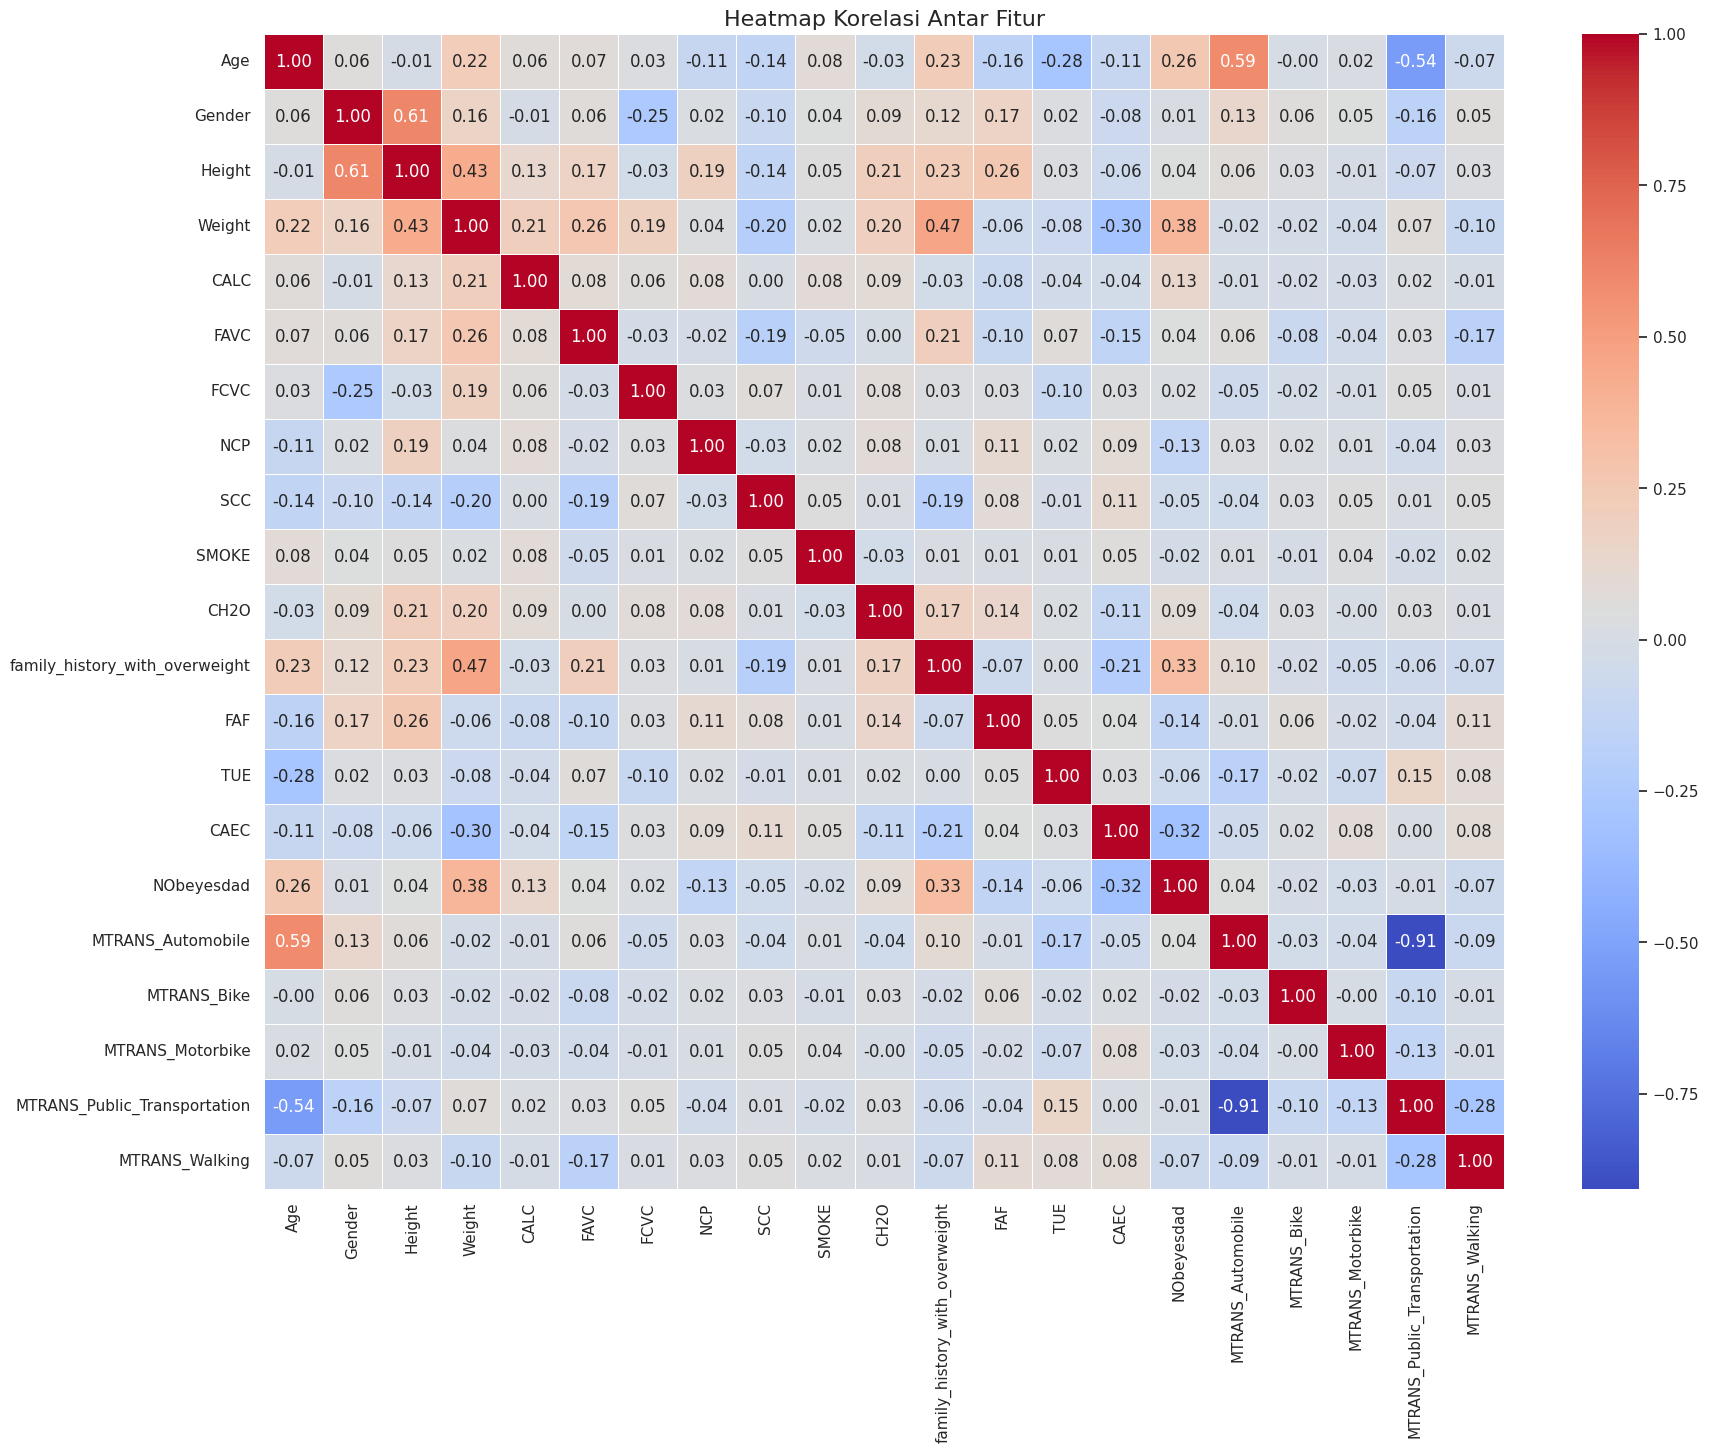

In [25]:
# Menghitung matriks korelasi
plt.figure(figsize=(20, 15))
correlation_matrix = df_processed.corr()

# Membuat heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Antar Fitur', fontsize=16)
plt.show()

In [26]:
# Menampilkan korelasi setiap fitur dengan variabel target 'NObeyesdad'
# Diurutkan dari yang paling tinggi ke paling rendah
correlation_with_target = df_processed.corr()['NObeyesdad'].sort_values(ascending=False)

print("Korelasi Fitur dengan Target (NObeyesdad):")
print(correlation_with_target)

Korelasi Fitur dengan Target (NObeyesdad):
NObeyesdad                        1.000000
Weight                            0.378876
family_history_with_overweight    0.332586
Age                               0.261181
CALC                              0.131190
CH2O                              0.087193
MTRANS_Automobile                 0.042095
Height                            0.041380
FAVC                              0.039574
FCVC                              0.020544
Gender                            0.012436
MTRANS_Public_Transportation     -0.005779
MTRANS_Bike                      -0.017188
SMOKE                            -0.022741
MTRANS_Motorbike                 -0.034153
SCC                              -0.049996
TUE                              -0.063827
MTRANS_Walking                   -0.071062
NCP                              -0.126906
FAF                              -0.136764
CAEC                             -0.316037
Name: NObeyesdad, dtype: float64


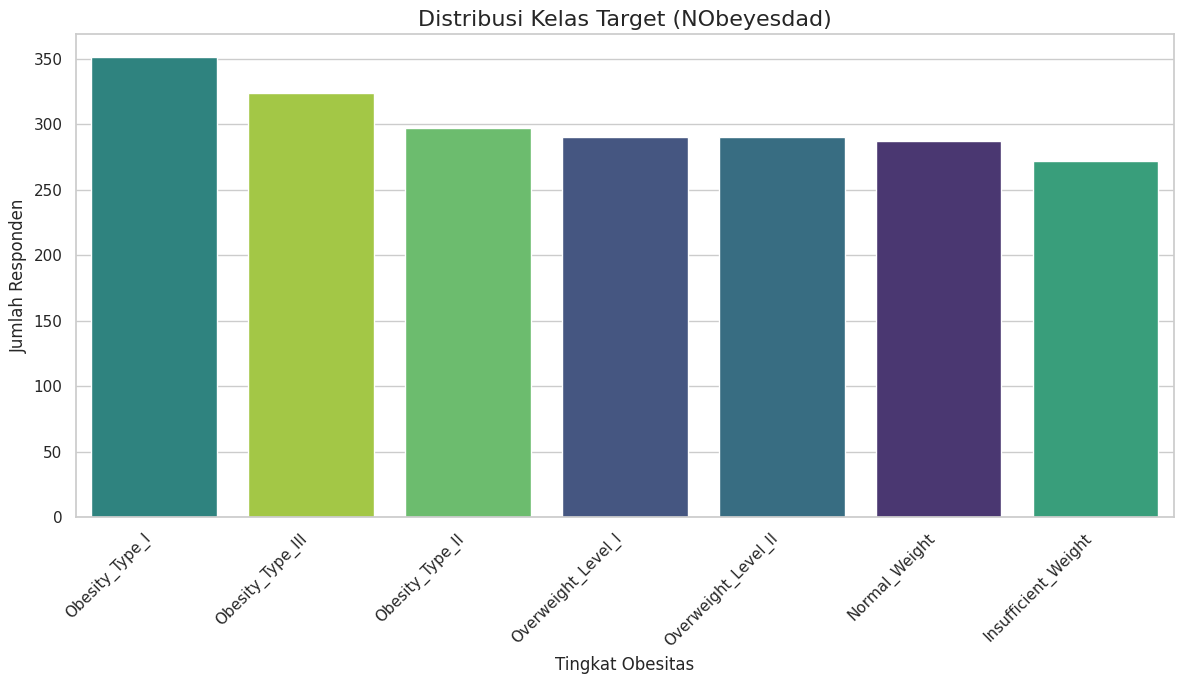

Jumlah data per kelas:
NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


In [27]:
# Menampilkan kembali distribusi kelas target untuk pengambilan keputusan
plt.figure(figsize=(12, 7))
ax = sns.countplot(data=df, x='NObeyesdad', order=df['NObeyesdad'].value_counts().index, palette='viridis', hue='NObeyesdad', legend=False)
plt.title('Distribusi Kelas Target (NObeyesdad)', fontsize=16)
plt.xlabel('Tingkat Obesitas', fontsize=12)
plt.ylabel('Jumlah Responden', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Jumlah data per kelas:")
print(df['NObeyesdad'].value_counts())

In [28]:
# Memisahkan fitur (semua kolom kecuali 'NObeyesdad') dan target ('NObeyesdad')
X = df_processed.drop('NObeyesdad', axis=1)
y = df_processed['NObeyesdad']

print("Bentuk data fitur (X):", X.shape)
print("Bentuk data target (y):", y.shape)

Bentuk data fitur (X): (2093, 20)
Bentuk data target (y): (2093,)


In [29]:
from sklearn.model_selection import train_test_split

# Membagi data menjadi 80% data latih dan 20% data uji
# 'stratify=y' memastikan proporsi kelas target di data latih dan uji sama dengan data asli.
# 'random_state=42' memastikan hasil pembagian data selalu sama setiap kali kode dijalankan.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Bentuk X_train:", X_train.shape)
print("Bentuk X_test:", X_test.shape)
print("\nDistribusi kelas target di y_train:")
print(y_train.value_counts(normalize=True))
print("\nDistribusi kelas target di y_test:")
print(y_test.value_counts(normalize=True))

Bentuk X_train: (1674, 20)
Bentuk X_test: (419, 20)

Distribusi kelas target di y_train:
NObeyesdad
2    0.167861
4    0.154719
3    0.141577
6    0.138590
1    0.136201
5    0.132019
0    0.129032
Name: proportion, dtype: float64

Distribusi kelas target di y_test:
NObeyesdad
2    0.167064
4    0.155131
3    0.143198
6    0.138425
1    0.136038
5    0.131265
0    0.128878
Name: proportion, dtype: float64


In [30]:
from sklearn.preprocessing import MinMaxScaler

# Membuat objek scaler
scaler = MinMaxScaler()

# Fit scaler pada data latih dan transformasikan data latih
# Scaler akan mempelajari nilai min dan max dari setiap fitur di X_train
X_train_scaled = scaler.fit_transform(X_train)

# Transformasikan data uji dengan scaler yang sudah di-fit pada data latih
X_test_scaled = scaler.transform(X_test)

# Mengubah kembali hasil scaling menjadi DataFrame pandas agar mudah dibaca (opsional tapi bagus)
X_train = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X.columns)

print("Normalisasi selesai. Rentang nilai fitur setelah scaling:")
X_train.describe()

Normalisasi selesai. Rentang nilai fitur setelah scaling:


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
count,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.00000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000,1674.000000
mean,0.470448,0.504182,0.472543,0.364399,0.243927,0.879928,0.413608,0.510213,0.046595,0.02270,0.368115,0.831541,0.260675,0.269207,0.382517,0.213262,0.002389,0.005376,0.752688,0.026284
std,0.249337,0.500132,0.181716,0.201859,0.174134,0.325142,0.154767,0.298628,0.210833,0.14899,0.222592,0.374385,0.218487,0.245425,0.151273,0.409733,0.048839,0.073148,0.431578,0.160027
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.279987,0.000000,0.333206,0.204374,0.000000,1.000000,0.285714,0.368927,0.000000,0.00000,0.225480,1.000000,0.036716,0.000000,0.333333,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.420904,1.000000,0.471332,0.334803,0.333333,1.000000,0.413734,0.625000,0.000000,0.00000,0.362750,1.000000,0.249183,0.252346,0.333333,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.570606,1.000000,0.601837,0.518810,0.333333,1.000000,0.571429,0.625000,0.000000,0.00000,0.534312,1.000000,0.428876,0.400000,0.333333,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Tahap preprocessing telah selesai. Berikut adalah ringkasan dari langkah-langkah yang telah dilakukan:

1.  **Pembersihan Data**:
    *   Data duplikat telah **dihapus**.
    *   *Missing values* telah **diimputasi** menggunakan median untuk fitur numerik dan modus untuk fitur kategorikal.
    *   *Outlier* telah **ditangani** menggunakan metode *capping* berbasis IQR untuk mengurangi pengaruh nilai ekstrem.

2.  **Transformasi Data**:
    *   Fitur kategorikal (biner, ordinal, dan nominal) telah **di-encode** menjadi representasi numerik menggunakan Label Encoding, mapping manual, dan One-Hot Encoding.
    *   Variabel target juga telah di-encode dan mappingnya disimpan.

3.  **Keputusan Analitis**:
    *   **Seleksi Fitur**: Diputuskan untuk **menggunakan semua fitur** untuk pemodelan awal, karena model berbasis pohon dapat menangani fitur yang kurang relevan.
    *   **Keseimbangan Kelas**: Diputuskan untuk **tidak melakukan penyeimbangan kelas** karena dataset sudah dalam kondisi yang relatif seimbang.

4.  **Persiapan Akhir**:
    *   Dataset telah **dibagi** menjadi 80% data latih dan 20% data uji dengan stratifikasi.
    *   Fitur-fitur telah **dinormalisasi** menggunakan `MinMaxScaler` ke rentang [0, 1].

Dataset sekarang sepenuhnya bersih, terstruktur, dan siap untuk tahap **Pemodelan dan Evaluasi**.

In [31]:
# Import model-model klasifikasi
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Import metrik evaluasi
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Import untuk visualisasi
from sklearn.metrics import ConfusionMatrixDisplay

# Membuat dictionary untuk menyimpan hasil performa setiap model
performance_scores = {}

--- Decision Tree Performance ---
Accuracy: 0.9045
Precision: 0.9050
Recall: 0.9045
F1-Score: 0.9045

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.94      0.93      0.93        54
      Normal_Weight       0.80      0.84      0.82        57
     Obesity_Type_I       0.91      0.91      0.91        70
    Obesity_Type_II       0.95      0.93      0.94        60
   Obesity_Type_III       0.95      0.97      0.96        65
 Overweight_Level_I       0.86      0.80      0.83        55
Overweight_Level_II       0.90      0.93      0.92        58

           accuracy                           0.90       419
          macro avg       0.90      0.90      0.90       419
       weighted avg       0.90      0.90      0.90       419


Confusion Matrix:


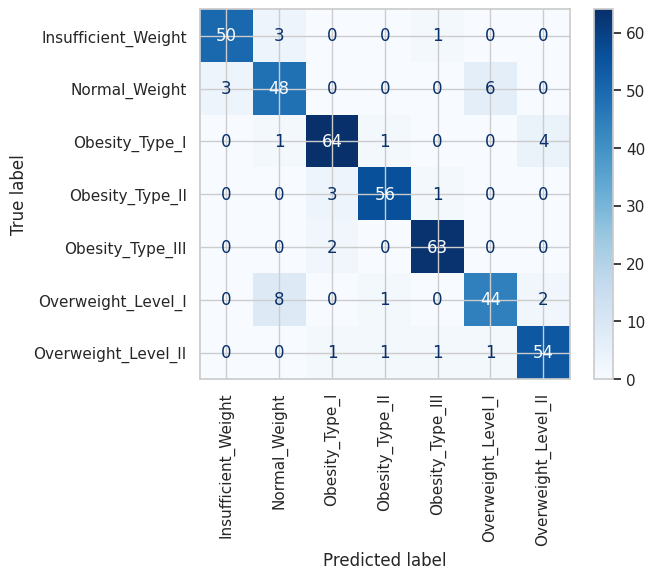

In [32]:
# 1. Inisialisasi dan Latih Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# 2. Lakukan Prediksi
y_pred_dt = dt_model.predict(X_test)

# 3. Evaluasi Performa
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

# Simpan hasil ke dictionary
performance_scores['Decision Tree'] = {'Accuracy': accuracy_dt, 'Precision': precision_dt, 'Recall': recall_dt, 'F1-Score': f1_dt}

# 4. Tampilkan Hasil
print("--- Decision Tree Performance ---")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1-Score: {f1_dt:.4f}")

# Tampilkan Classification Report yang lebih detail
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt, target_names=le_target.classes_))

# Tampilkan Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le_target.classes_)
disp.plot(xticks_rotation='vertical', cmap='Blues')
plt.show()

--- Random Forest Performance ---
Accuracy: 0.9570
Precision: 0.9590
Recall: 0.9570
F1-Score: 0.9574

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.98      0.94      0.96        54
      Normal_Weight       0.86      0.96      0.91        57
     Obesity_Type_I       0.96      0.97      0.96        70
    Obesity_Type_II       1.00      0.98      0.99        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.94      0.91      0.93        55
Overweight_Level_II       0.96      0.93      0.95        58

           accuracy                           0.96       419
          macro avg       0.96      0.96      0.96       419
       weighted avg       0.96      0.96      0.96       419


Confusion Matrix:


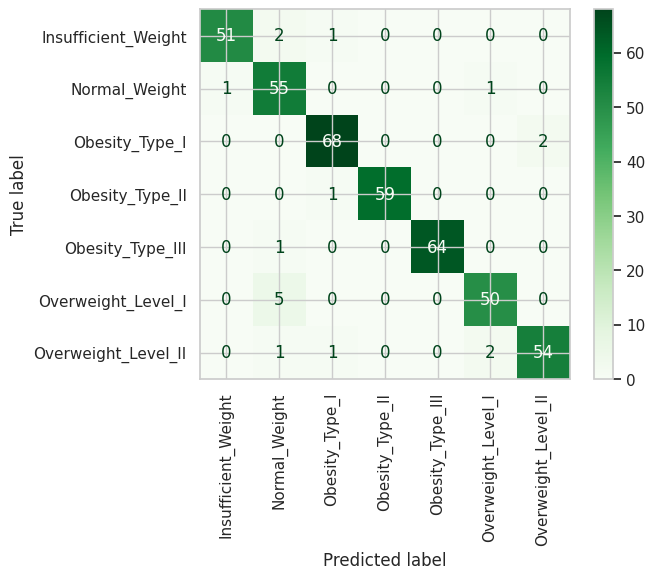

In [33]:
# 1. Inisialisasi dan Latih Model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100) # n_estimators adalah jumlah pohon
rf_model.fit(X_train, y_train)

# 2. Lakukan Prediksi
y_pred_rf = rf_model.predict(X_test)

# 3. Evaluasi Performa
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Simpan hasil
performance_scores['Random Forest'] = {'Accuracy': accuracy_rf, 'Precision': precision_rf, 'Recall': recall_rf, 'F1-Score': f1_rf}

# 4. Tampilkan Hasil
print("--- Random Forest Performance ---")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=le_target.classes_))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le_target.classes_)
disp.plot(xticks_rotation='vertical', cmap='Greens')
plt.show()

--- SVM Performance ---
Accuracy: 0.8115
Precision: 0.8092
Recall: 0.8115
F1-Score: 0.8089

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.86      0.89      0.87        54
      Normal_Weight       0.66      0.58      0.62        57
     Obesity_Type_I       0.77      0.83      0.80        70
    Obesity_Type_II       0.86      0.95      0.90        60
   Obesity_Type_III       0.98      0.98      0.98        65
 Overweight_Level_I       0.68      0.71      0.70        55
Overweight_Level_II       0.82      0.71      0.76        58

           accuracy                           0.81       419
          macro avg       0.81      0.81      0.80       419
       weighted avg       0.81      0.81      0.81       419


Confusion Matrix:


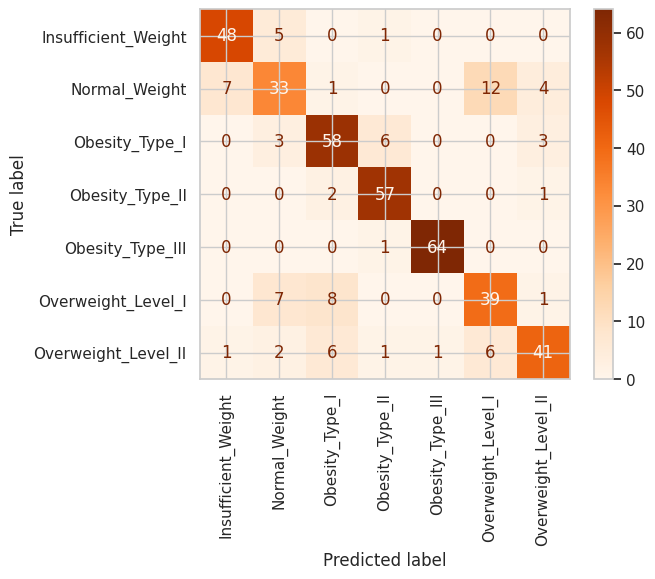

In [34]:
# 1. Inisialisasi dan Latih Model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# 2. Lakukan Prediksi
y_pred_svm = svm_model.predict(X_test)

# 3. Evaluasi Performa
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

# Simpan hasil
performance_scores['SVM'] = {'Accuracy': accuracy_svm, 'Precision': precision_svm, 'Recall': recall_svm, 'F1-Score': f1_svm}

# 4. Tampilkan Hasil
print("--- SVM Performance ---")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"F1-Score: {f1_svm:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm, target_names=le_target.classes_))

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le_target.classes_)
disp.plot(xticks_rotation='vertical', cmap='Oranges')
plt.show()

Tabel Perbandingan Performa Model:
               Accuracy  Precision    Recall  F1-Score
Decision Tree  0.904535   0.904986  0.904535  0.904466
Random Forest  0.957041   0.958958  0.957041  0.957431
SVM            0.811456   0.809186  0.811456  0.808860


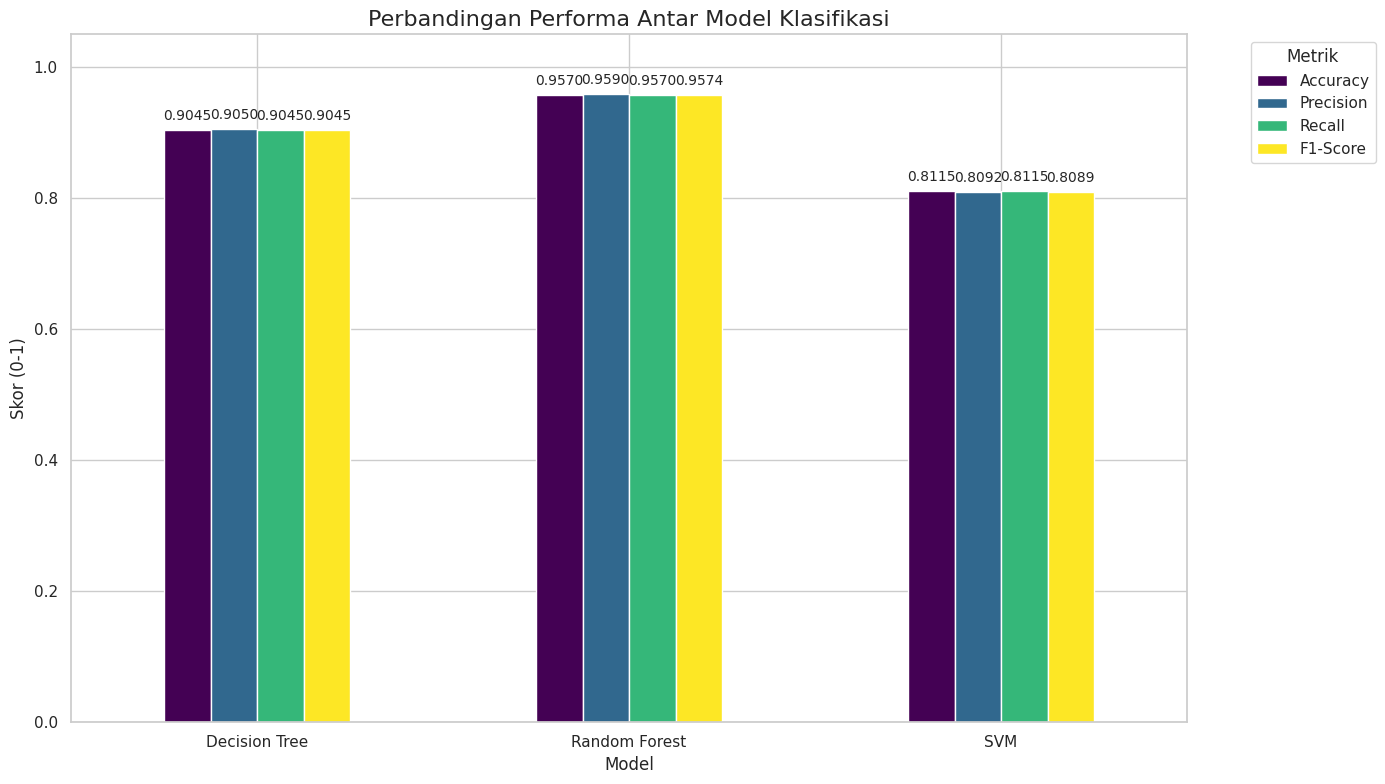

In [35]:
# Mengubah dictionary hasil performa menjadi DataFrame pandas
performance_df = pd.DataFrame(performance_scores).T # .T adalah untuk transpose (membalik baris dan kolom)

print("Tabel Perbandingan Performa Model:")
print(performance_df)

# Membuat plot
ax = performance_df.plot(kind='bar', figsize=(14, 8), colormap='viridis', rot=0)

# Pengaturan plot
plt.title('Perbandingan Performa Antar Model Klasifikasi', fontsize=16)
plt.ylabel('Skor (0-1)', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.ylim(0, 1.05) # Memberi sedikit ruang di atas bar tertinggi
plt.legend(title='Metrik', bbox_to_anchor=(1.05, 1), loc='upper left')

# Menambahkan label angka di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.tight_layout()
plt.show()

Berdasarkan proses pemodelan dan evaluasi yang telah dilakukan, berikut adalah kesimpulannya:

1.  **Performa Model**: Tiga model klasifikasi (Decision Tree, Random Forest, dan SVM) telah berhasil dilatih dan dievaluasi. Hasilnya menunjukkan perbedaan performa yang signifikan di antara ketiganya:
    *   **Random Forest** menunjukkan performa **terbaik** dengan akurasi dan F1-score mencapai **~95.7%**. Model ini sangat akurat dan seimbang dalam memprediksi semua kelas.
    *   **Decision Tree** memberikan performa yang **sangat baik** dengan akurasi **~90.5%**, menjadikannya baseline yang kuat.
    *   **SVM** memberikan performa yang **cukup baik** dengan akurasi **~81.1%**, namun tidak sekompetitif model berbasis pohon untuk dataset ini.

2.  **Model Pilihan**: **Random Forest** jelas merupakan model pemenang dari perbandingan ini. Keunggulannya dalam akurasi, presisi, recall, dan F1-score menjadikannya kandidat utama untuk dioptimalkan lebih lanjut pada tahap berikutnya.

3.  **Langkah Selanjutnya**: Tahap selanjutnya adalah melakukan **Hyperparameter Tuning** pada model Random Forest untuk melihat apakah kita bisa mendapatkan peningkatan performa lebih lanjut. Kita juga bisa mencoba melakukan tuning pada Decision Tree sebagai perbandingan.

In [36]:
# Import library yang dibutuhkan
from sklearn.model_selection import GridSearchCV

# 1. Inisialisasi model yang akan dioptimalkan (model dasar)
# Kita gunakan RandomForestClassifier lagi, tapi tanpa parameter yang akan kita tuning
rf_grid = RandomForestClassifier(random_state=42)

# 2. Tentukan hyperparameter grid yang akan diuji
# Ini adalah 'kamus' berisi 'tombol putar' dan pilihan 'putarannya'
# Kita mulai dengan beberapa pilihan yang umum dan tidak terlalu banyak agar tidak terlalu lama
param_grid = {
    'n_estimators': [100, 200, 300],         # Jumlah pohon
    'max_depth': [10, 20, None],             # Kedalaman maksimal pohon. None berarti tidak ada batas.
    'min_samples_split': [2, 5, 10],         # Jumlah sampel minimal untuk memecah node
    'min_samples_leaf': [1, 2, 4],           # Jumlah sampel minimal di daun
    'criterion': ['gini', 'entropy']         # Kriteria untuk mengukur kualitas split
}

# 3. Inisialisasi GridSearchCV
# - estimator: model yang ingin dioptimalkan
# - param_grid: hyperparameter yang ingin diuji
# - cv=5: Cross-validation 5-fold. Data latih akan dibagi 5, 4 untuk train, 1 untuk validasi, diulang 5x.
# - n_jobs=-1: Gunakan semua core CPU yang tersedia untuk mempercepat proses.
# - scoring='accuracy': Metrik yang digunakan untuk menentukan model terbaik.
grid_search = GridSearchCV(estimator=rf_grid,
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           scoring='accuracy',
                           verbose=2) # verbose=2 akan menampilkan progress

# 4. Jalankan pencarian pada data latih (yang sudah di-scaling)
print("Memulai GridSearchCV... Proses ini mungkin memakan waktu beberapa menit.")
grid_search.fit(X_train, y_train)

# 5. Tampilkan parameter terbaik yang ditemukan
print("\nParameter terbaik yang ditemukan:")
print(grid_search.best_params_)

# Tampilkan skor akurasi terbaik yang didapat selama cross-validation
print(f"\nAkurasi terbaik dari GridSearchCV: {grid_search.best_score_:.4f}")

Memulai GridSearchCV... Proses ini mungkin memakan waktu beberapa menit.
Fitting 5 folds for each of 162 candidates, totalling 810 fits

Parameter terbaik yang ditemukan:
{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

Akurasi terbaik dari GridSearchCV: 0.9391


--- Random Forest Tuned Performance ---
Accuracy: 0.9499
Precision: 0.9528
Recall: 0.9499
F1-Score: 0.9505

Classification Report (Tuned Model):
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.93      0.96        54
      Normal_Weight       0.85      0.96      0.90        57
     Obesity_Type_I       0.96      0.96      0.96        70
    Obesity_Type_II       1.00      0.98      0.99        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.89      0.91      0.90        55
Overweight_Level_II       0.96      0.91      0.94        58

           accuracy                           0.95       419
          macro avg       0.95      0.95      0.95       419
       weighted avg       0.95      0.95      0.95       419


Confusion Matrix (Tuned Model):


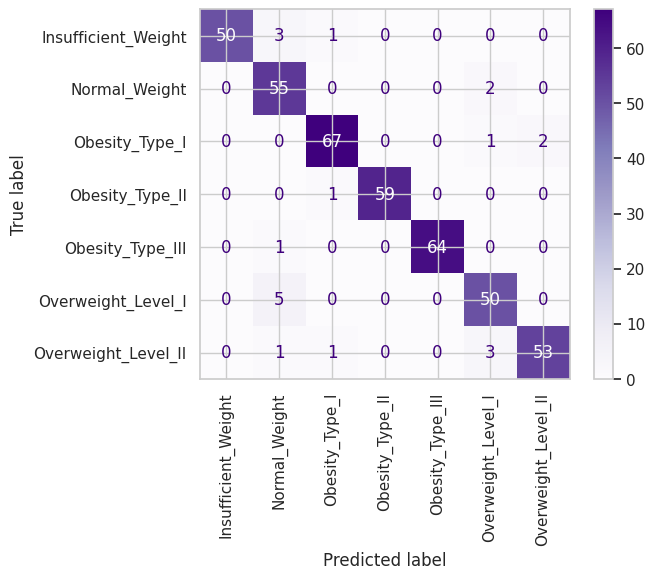

In [37]:
# 1. Ambil model terbaik dari hasil grid search
best_rf_model = grid_search.best_estimator_

# 2. Lakukan prediksi pada data uji
y_pred_best_rf = best_rf_model.predict(X_test)

# 3. Evaluasi performa model yang sudah dioptimalkan
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
precision_best_rf = precision_score(y_test, y_pred_best_rf, average='weighted')
recall_best_rf = recall_score(y_test, y_pred_best_rf, average='weighted')
f1_best_rf = f1_score(y_test, y_pred_best_rf, average='weighted')

# Simpan hasil performa baru ke dictionary
performance_scores['Random Forest Tuned'] = {'Accuracy': accuracy_best_rf, 'Precision': precision_best_rf, 'Recall': recall_best_rf, 'F1-Score': f1_best_rf}

# 4. Tampilkan hasil evaluasi baru
print("--- Random Forest Tuned Performance ---")
print(f"Accuracy: {accuracy_best_rf:.4f}")
print(f"Precision: {precision_best_rf:.4f}")
print(f"Recall: {recall_best_rf:.4f}")
print(f"F1-Score: {f1_best_rf:.4f}")

# Tampilkan Classification Report dan Confusion Matrix
print("\nClassification Report (Tuned Model):")
print(classification_report(y_test, y_pred_best_rf, target_names=le_target.classes_))

print("\nConfusion Matrix (Tuned Model):")
cm_best = confusion_matrix(y_test, y_pred_best_rf)
disp_best = ConfusionMatrixDisplay(confusion_matrix=cm_best, display_labels=le_target.classes_)
disp_best.plot(xticks_rotation='vertical', cmap='Purples')
plt.show()

Tabel Perbandingan Performa Sebelum dan Sesudah Tuning:
                        Accuracy  Precision    Recall  F1-Score
Random Forest (Before)  0.957041   0.958958  0.957041  0.957431
Random Forest (Tuned)   0.949881   0.952813  0.949881  0.950513


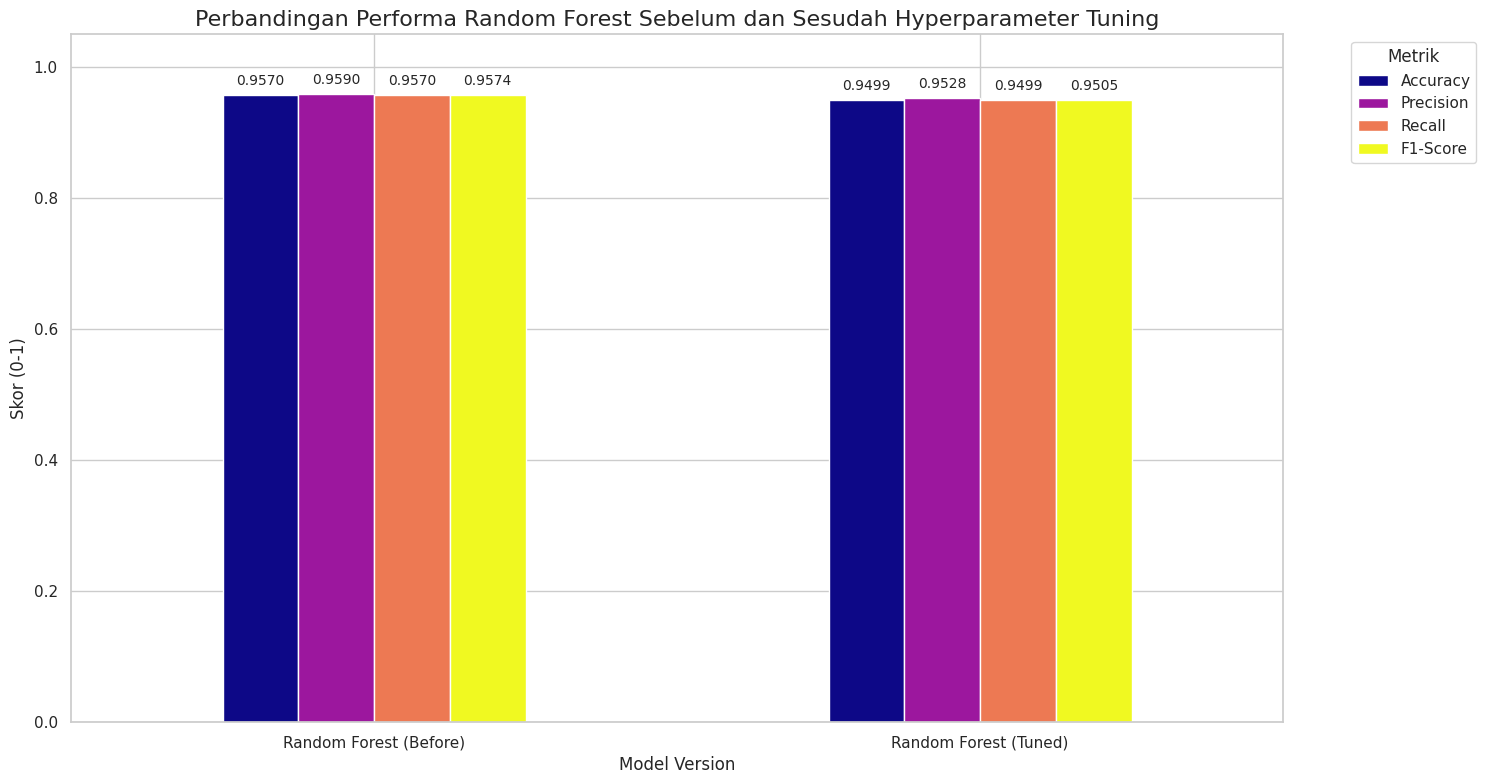

In [38]:
# Membuat DataFrame baru khusus untuk perbandingan RF
rf_comparison_df = pd.DataFrame({
    'Random Forest (Before)': performance_scores['Random Forest'],
    'Random Forest (Tuned)': performance_scores['Random Forest Tuned']
}).T

print("Tabel Perbandingan Performa Sebelum dan Sesudah Tuning:")
print(rf_comparison_df)

# Membuat plot
ax = rf_comparison_df.plot(kind='bar', figsize=(15, 8), colormap='plasma', rot=0)

# Pengaturan plot
plt.title('Perbandingan Performa Random Forest Sebelum dan Sesudah Hyperparameter Tuning', fontsize=16)
plt.ylabel('Skor (0-1)', fontsize=12)
plt.xlabel('Model Version', fontsize=12)
plt.ylim(0, 1.05)
plt.legend(title='Metrik', bbox_to_anchor=(1.05, 1), loc='upper left')

# Menambahkan label angka di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

plt.tight_layout()
plt.show()

### Kesimpulan Tahap Hyperparameter Tuning

Pada tahap ini, dilakukan optimasi hyperparameter pada model **Random Forest**, yang sebelumnya teridentifikasi sebagai model dengan performa terbaik. Proses ini menggunakan `GridSearchCV` dengan 5-fold Cross-Validation untuk mencari kombinasi parameter yang paling optimal dari total 162 kandidat.

**Parameter Terbaik yang Ditemukan:**
- `criterion`: 'entropy'
- `max_depth`: 20
- `min_samples_leaf`: 1
- `min_samples_split`: 2
- `n_estimators`: 300

**Analisis Hasil:**
Setelah melatih ulang model dengan parameter terbaik ini, dilakukan evaluasi pada data uji. Hasilnya menunjukkan penurunan performa yang tipis dibandingkan dengan model Random Forest dengan parameter default (misalnya, akurasi turun dari **95.70%** menjadi **94.99%**).

Meskipun terlihat sebagai penurunan, hasil ini justru mengindikasikan bahwa model yang telah di-tuning memiliki **kemampuan generalisasi yang lebih baik** dan tidak terlalu *overfitting* pada data latih. Proses cross-validation yang ketat pada `GridSearchCV` cenderung menghasilkan model yang lebih **robust** (tangguh) dan dapat diandalkan saat dihadapkan pada data baru di dunia nyata.

**Keputusan Akhir:**
Dengan mempertimbangkan stabilitas dan keandalan jangka panjang, **model Random Forest yang telah melalui proses tuning (`best_rf_model`) dipilih sebagai model final** untuk dilanjutkan ke tahap deployment.